## <font color="#00afe6">1. Nettoyage des données</font>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/enopenfoodfactsorgproducts/cleaned_openfoodfacts.csv
/kaggle/input/enopenfoodfactsorgproducts/countries-en.csv
/kaggle/input/enopenfoodfactsorgproducts/en.openfoodfacts.org.products.csv


Le jeu de données téléchargé en CSV sur le site [Open Food Facts](https://world.openfoodfacts.org/) est importé dans le Notebook via la méthode `read_csv` de la librairie `pandas`

In [ ]:
datas = pd.read_csv("../input/enopenfoodfactsorgproducts/en.openfoodfacts.org.products.csv",
                    sep='\t', low_memory=False)

Affichons à présent quelques lignes au hasard du dataset puis regardons sa `shape`

In [ ]:
datas.sample(5)

code                                                url  \
601334   2836160025328  http://world-en.openfoodfacts.org/product/2836...   
1397674  8003160590123  http://world-en.openfoodfacts.org/product/8003...   
1210900  5400151049661  http://world-en.openfoodfacts.org/product/5400...   
1275110  6091002011068  http://world-en.openfoodfacts.org/product/6091...   
306988   0282057016405  http://world-en.openfoodfacts.org/product/0282...   

                            creator   created_t      created_datetime  \
601334                      kiliweb  1568664695  2019-09-16T20:11:35Z   
1397674  openfoodfacts-contributors  1568022809  2019-09-09T09:53:29Z   
1210900                     kiliweb  1540984127  2018-10-31T11:08:47Z   
1275110                     kiliweb  1539667110  2018-10-16T05:18:30Z   
306988                      kiliweb  1583423230  2020-03-05T15:47:10Z   

         last_modified_t last_modified_datetime  \
601334        1605048302   2020-11-10T22:45:02Z   
1397674       1568022896   2019-09-09T09:54:56Z   
1210900       1557008441   2019-05-04T22:20:41Z   
1275110       1560803805   2019-06-17T20:36:45Z   
306988        1583423232   2020-03-05T15:47:12Z   

                                 product_name abbreviated_product_name  \
601334                         Cheddar cheese                      NaN   
1397674                  patatine da friggere                      NaN   
1210900                               Ravioli                      NaN   
1275110  Panier de yoplait fruits et céréales                      NaN   
306988                       Pain au chocolat                      NaN   

        generic_name  ... carbon-footprint-from-meat-or-fish_100g  \
601334           NaN  ...                                     NaN   
1397674          NaN  ...                                     NaN   
1210900          NaN  ...                                     NaN   
1275110          NaN  ...                                     NaN   
306988           NaN  ...                                     NaN   

        nutrition-score-fr_100g nutrition-score-uk_100g glycemic-index_100g  \
601334                      NaN                     NaN                 NaN   
1397674                     NaN                     NaN                 NaN   
1210900                     5.0                     NaN                 NaN   
1275110                     NaN                     NaN                 NaN   
306988                      NaN                     NaN                 NaN   

        water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g  \
601334                  NaN          NaN                NaN              NaN   
1397674                 NaN          NaN                NaN              NaN   
1210900                 NaN          NaN                NaN              NaN   
1275110                 NaN          NaN                NaN              NaN   
306988                  NaN          NaN                NaN              NaN   

        inositol_100g carnitine_100g  
601334            NaN            NaN  
1397674           NaN            NaN  
1210900           NaN            NaN  
1275110           NaN            NaN  
306988            NaN            NaN  

[5 rows x 184 columns]

In [ ]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 1701965 lignes et 184 variables


### <font color="#ea1c60" id="section_1">1.1. Colonnes et lignes vides / Doublons</font>
Regardons à présent les **variables qui comptent le plus de valeurs null**:

In [ ]:
def null_factor(df, tx_threshold=50):
  null_rate = ((datas.isnull().sum() / datas.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [ ]:
full_null_rate = null_factor(datas, 100)
full_null_rate

Variable  Taux_de_Null
0                           allergens_en         100.0
1                          no_nutriments         100.0
2                                 cities         100.0
3  ingredients_that_may_be_from_palm_oil         100.0
4              ingredients_from_palm_oil         100.0
5                              additives         100.0
6                nutrition-score-uk_100g         100.0
7                    water-hardness_100g         100.0

Nous allons regarder le taux de remplissage des variables graphiquement et fixer un **seuil de suppression à 25% de taux de remplissage** :

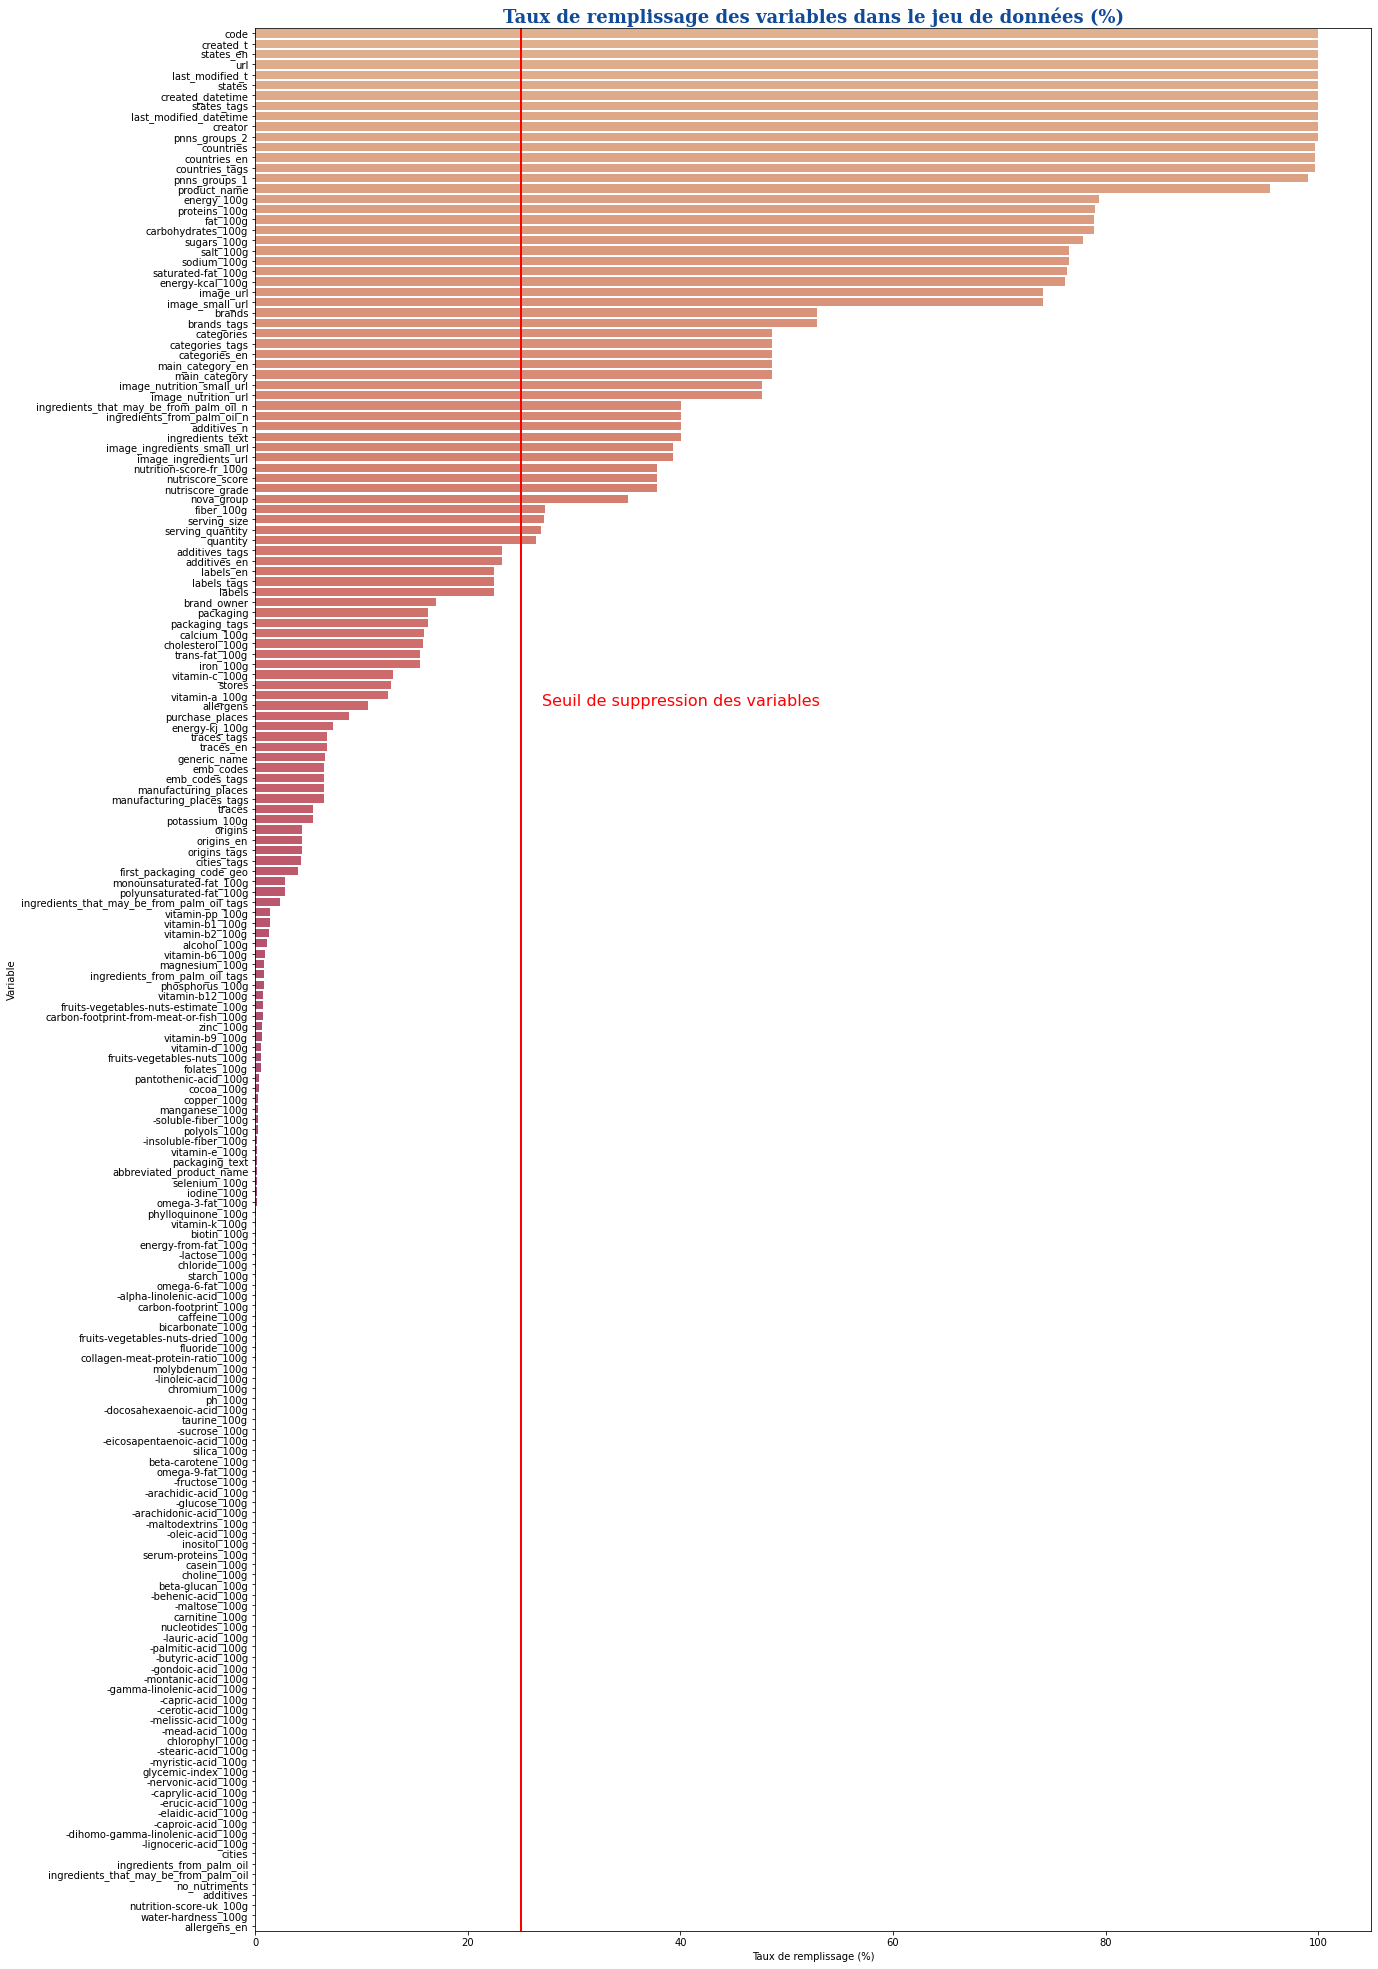

In [ ]:
filling_features = null_factor(datas, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False)

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [ ]:
#Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null']>=sup_threshold, 'Variable'].values)
#Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null']<sup_threshold, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
datas = datas[features_to_conserve].sort_values(["created_datetime","last_modified_datetime"], ascending=True)
datas.sample(5)

code   created_t  \
1301255  7310340134000  1573056225   
70087    0035826084286  1587644385   
1290823  6674111690036  1471376756   
861572   3560070157259  1491903744   
633730   3068230016533  1560532118   

                                                 states_en  \
1301255  To be completed,Nutrition facts to be complete...   
70087    To be completed,Nutrition facts completed,Ingr...   
1290823  To be completed,Nutrition facts to be complete...   
861572   To be checked,Complete,Nutrition facts complet...   
633730   To be completed,Nutrition facts completed,Ingr...   

                                                       url  last_modified_t  \
1301255  http://world-en.openfoodfacts.org/product/7310...       1573056228   
70087    http://world-en.openfoodfacts.org/product/0035...       1587644386   
1290823  http://world-en.openfoodfacts.org/product/6674...       1471376758   
861572   http://world-en.openfoodfacts.org/product/3560...       1549137675   
633730   http://world-en.openfoodfacts.org/product/3068...       1569759558   

                                                    states  \
1301255  en:to-be-completed, en:nutrition-facts-to-be-c...   
70087    en:to-be-completed, en:nutrition-facts-complet...   
1290823  en:to-be-completed, en:nutrition-facts-to-be-c...   
861572   en:to-be-checked, en:complete, en:nutrition-fa...   
633730   en:to-be-completed, en:nutrition-facts-complet...   

             created_datetime  \
1301255  2019-11-06T16:03:45Z   
70087    2020-04-23T12:19:45Z   
1290823  2016-08-16T19:45:56Z   
861572   2017-04-11T09:42:24Z   
633730   2019-06-14T17:08:38Z   

                                               states_tags  \
1301255  en:to-be-completed,en:nutrition-facts-to-be-co...   
70087    en:to-be-completed,en:nutrition-facts-complete...   
1290823  en:to-be-completed,en:nutrition-facts-to-be-co...   
861572   en:to-be-checked,en:complete,en:nutrition-fact...   
633730   en:to-be-completed,en:nutrition-facts-complete...   

        last_modified_datetime                     creator  ...  \
1301255   2019-11-06T16:03:48Z  openfoodfacts-contributors  ...   
70087     2020-04-23T12:19:46Z           org-database-usda  ...   
1290823   2016-08-16T19:45:58Z  openfoodfacts-contributors  ...   
861572    2019-02-02T20:01:15Z  openfoodfacts-contributors  ...   
633730    2019-09-29T12:19:18Z                     kiliweb  ...   

                               image_ingredients_small_url  \
1301255                                                NaN   
70087                                                  NaN   
1290823                                                NaN   
861572   https://static.openfoodfacts.org/images/produc...   
633730                                                 NaN   

                                     image_ingredients_url  \
1301255                                                NaN   
70087                                                  NaN   
1290823                                                NaN   
861572   https://static.openfoodfacts.org/images/produc...   
633730                                                 NaN   

        nutrition-score-fr_100g nutriscore_score nutriscore_grade nova_group  \
1301255                     NaN              NaN              NaN        NaN   
70087                      11.0             11.0                d        4.0   
1290823                     NaN              NaN              NaN        NaN   
861572                     16.0             16.0                d        3.0   
633730                      3.0              3.0                c        NaN   

         fiber_100g  serving_size  serving_quantity  quantity  
1301255         NaN           NaN               NaN       NaN  
70087           3.6  1 ONZ (28 g)              28.0       NaN  
1290823         NaN           NaN               NaN       NaN  
861572          NaN          30 g              30.0     100 g  
633730          NaN           NaN             

155 features sur 184 ont un taux de valeurs nulles supérieur à 50%, ce qui représente une très grosse part de données manquantes. **La majeure partie de ces variables ne peuvent pas être recalculées** puisqu'il s'agit de mesures physico-chimiques directes sur les produits.

Il reste à présent 50 features dans notre dataset. Pour la suite des analyses, nous aurons besoin d'un minimum d'informations sur **les nutriments** des produits. Ces données sont **suffixées avec** `_100g`. Nous allons donc **conserver les lignes pour lesquelles au moins une de ces features est complétée** :

In [ ]:
def search_componant(df, suffix='_100g'):
  componant = []
  for col in df.columns:
      if '_100g' in col: componant.append(col)
  df_subset_columns = df[componant]
  return df_subset_columns

In [ ]:
df_subset_nutients = search_componant(datas,'_100g')
df_subset_nutients.head()

energy_100g  proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  \
943812       1717.0            3.0      10.9                73.5         49.3   
621796       1898.0            8.5      15.5                68.0          2.0   
706931       1615.0            6.9       3.2                80.4         51.8   
616580       1487.0            3.8       2.0                78.0         58.0   
649775       2040.0            7.0      25.0                56.0         33.0   

        salt_100g  sodium_100g  saturated-fat_100g  energy-kcal_100g  \
943812     1.7000      0.68000                 7.0               NaN   
621796     1.7526      0.70104                 1.3               NaN   
706931     0.0900      0.03600                 1.2             381.0   
616580     0.0900      0.03600                 0.6             351.0   
649775     0.3810      0.15240                14.0               NaN   

        nutrition-score-fr_100g  fiber_100g  
943812                     28.0         NaN  
621796                     10.0         3.0  
706931                     14.0         1.6  
616580                     13.0         1.7  
649775                     19.0         5.5

In [ ]:
print('Lignes nutriments (_100g) vides: {}'.format(df_subset_nutients.isnull().all(axis=1).sum()))

Lignes nutriments (_100g) vides: 323654


In [ ]:
datas = datas[df_subset_nutients.notnull().any(axis=1)]
datas.shape

(1378311, 50)

Notre jeu de données est à présent débarassé des lignes et colonnes peu complétées. Nous allons à présent **rechercher et supprimer les doublons**.

In [ ]:
# Suppression des doublons en fonction du code
datas.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [ ]:
datas[(datas["product_name"].isnull()==False)
      & (datas["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                              brands                   
Burger vegetariana                        Bonarea                      228
Filet de poulet                           La Nouvelle Agriculture      211
Burger vegana                             Bonarea                      159
Filets de poulet                          La Nouvelle Agriculture      129
Queso semicurado                          Entrepinares                 113
                                                                      ... 
Fruit shaped bubble gum with candy seeds  Dubble Bubble                  1
Fruit sherbet                             Toft's,  Toft Dairy  Inc.      1
Fruit shoot                               Robinsons                      1
                                          Teisseire, Fruit Shoot         1
🤬                                         🤬                              1
Name: code, Length: 699617, dtype: int64

In [ ]:
datas = datas[(datas["product_name"]!="🤬")
              & (datas["brands"]!="🤬")]

In [ ]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
datas = datas[(~datas.duplicated(["product_name","brands"],keep="last"))
      | ((datas['product_name'].isnull()) & (datas['brands'].isnull()))]

In [ ]:
datas.shape

(1124710, 50)

### <font color="#ea1c60" id="section_2">1.2. Variables redondantes</font>

Certaines variables dans le dataset sont en réalité des variables redondantes. C'est par exemple le cas des variables suffixées par `_tags` ou `_en` qui ne font que reprendre d'autres features traduites ou simplifiées.

C'est par exemple de cas des catégories produits :

In [ ]:
category_columns = ['categories','categories_tags','categories_en']
datas[datas[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

product_name  \
3321     Long Grove Confectionery Co, Creamy White Pret...   
43200    Original minis & beans, cherry, orange, strawb...   
1202155                                  Sauce aigre-douce   
721967   Aiguillettes de poulet marinées au basilic et ...   
668594   Bloc de foie gras de canard du Sud-Ouest avec ...   

                                                categories  \
3321                                                Snacks   
43200                Snacks, Sweet snacks, Confectioneries   
1202155              Epicerie, Sauces, Sauces aigre-douces   
721967                           fr:Aiguillettes de poulet   
668594   Conserves, Poissons et viandes et oeufs, Foies...   

                                           categories_tags  \
3321                                             en:snacks   
43200         en:snacks,en:sweet-snacks,en:confectioneries   
1202155    en:groceries,en:sauces,en:sweet-and-sour-sauces   
721967   en:meats,en:poultries,en:chickens,fr:aiguillet...   
668594   en:canned-foods,en:fish-and-meat-and-eggs,en:f...   

                                             categories_en  
3321                                                Snacks  
43200                  Snacks,Sweet snacks,Confectioneries  
1202155             Groceries,Sauces,Sweet and sour sauces  
721967   Meats,Poultries,Chickens,fr:Aiguillettes de po...  
668594   Canned foods,Fish and meat and eggs,Foies gras...

On remarque dans ces quelques exemples que les variables sont bien redondantes. Nous allons donc, lorsque la colonne suffixée `_en` existe, supprimer toutes les autres colonnes identiques non suffixées ou contenant `_tags` :

In [ ]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_en" in col:
      en = col.replace('_en','')
      tags = col.replace('_en','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,
                                                                        en in df.columns, tags in df.columns))
      if en in df.columns :
        redundant_columns.append(en)
      if tags in df.columns :
        redundant_columns.append(tags)

    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [ ]:
datas.drop(search_redundant_col(datas), axis=1, inplace=True)

states_en            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
states               'Suffixe _tags' -> True ;
countries_en         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
countries            'Suffixe _tags' -> True ;
brands               'Suffixe _tags' -> True ;
categories           'Suffixe _tags' -> True ;
categories_en        'Sans suffixe' -> True ; 'Suffixe _tags' -> True
main_category_en     'Sans suffixe' -> True ; 'Suffixe _tags' -> False


**Les dates également comportent une certaine redondance**. Entre les timestamp et les dates au format "yyyy-mm-dd", il est nécessaire d'en éliminer :

In [ ]:
datas['created_datetime'] = pd.to_datetime(datas['created_t'], unit='s')
datas['last_modified_datetime'] = pd.to_datetime(datas['last_modified_t'], unit='s')
datas = datas.drop(['created_t','last_modified_t'], axis=1)
datas.head()

code                                          states_en  \
943812  3760029248001  To be checked,Complete,Nutrition facts complet...   
621796  3029330062806  To be completed,Nutrition facts completed,Ingr...   
706931  3257980112590  To be completed,Nutrition facts completed,Ingr...   
616580  3017760038409  To be completed,Nutrition facts completed,Ingr...   
649775  3160181210524  To be checked,Complete,Nutrition facts complet...   

                                                      url    created_datetime  \
943812  http://world-en.openfoodfacts.org/product/3760... 2012-01-31 14:43:58   
621796  http://world-en.openfoodfacts.org/product/3029... 2012-02-09 10:34:56   
706931  http://world-en.openfoodfacts.org/product/3257... 2012-02-11 14:51:07   
616580  http://world-en.openfoodfacts.org/product/3017... 2012-02-11 15:07:23   
649775  http://world-en.openfoodfacts.org/product/3160... 2012-02-11 18:51:58   

       last_modified_datetime   creator       pnns_groups_2  \
943812    2018-08-30 21:14:54  stephane              Sweets   
621796    2016-12-23 16:38:19  stephane          Appetizers   
706931    2021-02-22 22:39:03  marianne  Biscuits and cakes   
616580    2021-02-02 20:38:52  marianne  Biscuits and cakes   
649775    2019-08-23 19:57:37  stephane  Biscuits and cakes   

                             countries_en  pnns_groups_1  \
943812                             France  Sugary snacks   
621796                             France   Salty snacks   
706931                             France  Sugary snacks   
616580  Belgium,Canada,France,Switzerland  Sugary snacks   
649775                             France  Sugary snacks   

                                             product_name  ...  \
943812  Caramels tendres au beurre salé au sel de Guér...  ...   
621796            Jacquet Les bouchées créatives à garnir  ...   
706931                            Boudoirs aux œufs frais  ...   
616580                           Lulu La Barquette Fraise  ...   
649775                      Cookies tout chocolat Biocoop  ...   

                              image_ingredients_small_url  \
943812  https://static.openfoodfacts.org/images/produc...   
621796  https://static.openfoodfacts.org/images/produc...   
706931  https://static.openfoodfacts.org/images/produc...   
616580  https://static.openfoodfacts.org/images/produc...   
649775  https://static.openfoodfacts.org/images/produc...   

                                    image_ingredients_url  \
943812  https://static.openfoodfacts.org/images/produc...   
621796  https://static.openfoodfacts.org/images/produc...   
706931  https://static.openfoodfacts.org/images/produc...   
616580  https://static.openfoodfacts.org/images/produc...   
649775  https://static.openfoodfacts.org/images/produc...   

        nutrition-score-fr_100g  nutriscore_score  nutriscore_grade  \
943812                     28.0              28.0                 e   
621796                     10.0              10.0                 c   
706931                     14.0              14.0                 d   
616580                     13.0              13.0                 d   
649775                     19.0              19.0                 e   

        nova_group  fiber_100g  \
943812         4.0         NaN   
621796         3.0         3.0   
706931         4.0         1.6   
616580         4.0         1.7   
649775         4.0         5.5   

                                             serving_size  serving_quantity  \
943812                                                NaN               NaN   
621796                                                NaN               NaN   
706931  5,8 g par boudoir (Ce paquet contient 30 boudo...              5.80   
616580                                             6.66 g              6.66   
649775                                     2 cookies, 33g             33.00   

       quantity  
943812    100 g  
621796     54 g  
706931    175 g  
616580    120 g  
64977

Nous pouvons à présent regarder la **distribution des contributions par année** :

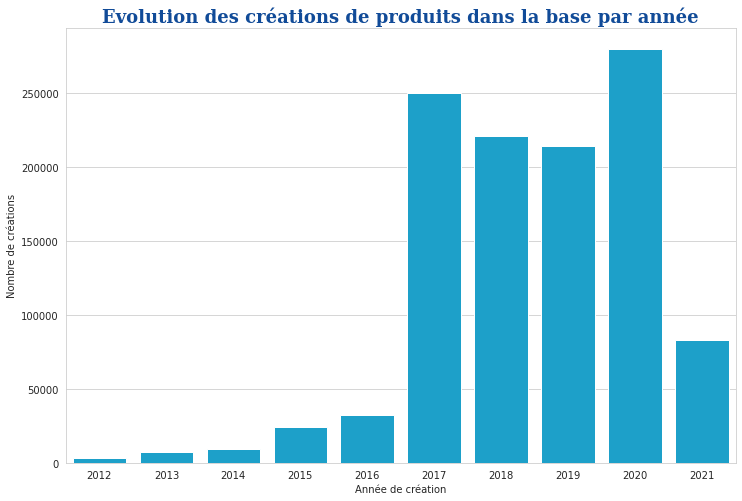

In [ ]:
add_per_year = datas[['created_datetime', 'code']].groupby(by=datas['created_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')

plt.title("Evolution des créations de produits dans la base par année", fontdict=font_title)
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")
plt.show()

Les années de 2012 à 2016 sont visiblement bien moins représentées que les années 2017 à 2019. La mise en place du Nutri-Score a été votée dans le cadre de la **loi Santé de 2016**.

In [ ]:
datas.shape

(1124710, 40)

A présent, notre dataset compte 40 variables qui ne contienent plus de redondance et 1 124 710 lignes. Nous allons maintenant nous intéresser à une variable importante : le pays.

### <font color="#ea1c60" id="section_3">1.3. Les pays de l'analyse</font>

Regardons tout d'abord le nombre de pays représentés *(s'il est trop élevé, c'est que des erreurs existent)*

In [ ]:
countries = datas.groupby(by="countries_en").nunique()

In [ ]:
countries[['code']].head()

code
countries_en                          
Afghanistan,Belgium,France           2
Afghanistan,France                 122
Afghanistan,France,French Guiana     1
Afghanistan,France,Germany           2
Afghanistan,France,Switzerland       2

Plusieurs pays sont regroupés dans la même variable, nous allons devoir effectuer un split du texte pour visualiser tout nos pays :

In [ ]:
def split_words(df, column = 'countries_en'):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [ ]:
#Liste contenant tous les pays du jeu de données (bons ou mauvais)
list_countries = split_words(datas, 'countries_en')

In [ ]:
print("Nombre de pays représentés : {}".format(len(list_countries)))

Nombre de pays représentés : 551


Nous allons charger une **base de données des pays, en Anglais**, pour déterminer les pays qui ne matchent pas *(mauvaise orthographe ou autre)*.

In [ ]:
df_countries = pd.read_csv("../input/enopenfoodfactsorgproducts/countries-en.csv",
                        sep=",", header=None, index_col = 0).rename(columns={0:"index", 1:"country_id", 2:"country_code_2", 3:"country_code_3", 4:"country_fr", 5:"country_en"})
df_countries.head()

country_id country_code_2 country_code_3         country_fr      country_en
0                                                                             
1           4             AF            AFG        Afghanistan     Afghanistan
2           8             AL            ALB            Albanie         Albania
3          10             AQ            ATA        Antarctique      Antarctica
4          12             DZ            DZA            Algérie         Algeria
5          16             AS            ASM  Samoa Américaines  American Samoa

In [ ]:
df_countries = pd.merge(pd.DataFrame(list_countries, columns=["countries_dataset"]),df_countries, how="left",
         left_on="countries_dataset", right_on="country_en")

In [ ]:
false_country_list = list(df_countries[df_countries.isnull().sum(axis=1)>0].countries_dataset)
false_country_list[0:15]

['Croacia',
 'Kyrgyzstan-русский',
 'de:suiza',
 'fr:francia',
 'Suede',
 'fr:deutschland',
 '�',
 'Maroc',
 'Malaysia-中文',
 'de:pays-bas',
 'Autriche',
 'Malaysia-bahasa-melayu',
 'The Bahamas',
 'Guinee',
 'es:deutschland']

puis nous allons **supprimer ces pays "fantômes" de la base de données** :

In [ ]:
for index, countries in datas['countries_en'].str.split(',').items():
  if isinstance(countries, float):
    continue
  country_name = []
  found = False
  for country in countries:
    if country in false_country_list:
      found = True
    else:
      country_name.append(country)
  if found:
    datas.loc[index, 'countries_en'] = ','.join(country_name)

In [ ]:
print("Nouveau nombre de pays représentés : {}".format(len(split_words(datas, 'countries_en'))))

Nouveau nombre de pays représentés : 185


Le nombre de pays représenté est à présent plus cohérent et la perte d'informations est limitée. Il nous reste à présent à **compléter les valeurs nulles pour cette variable**.

In [ ]:
datas['countries_en'] = np.where((datas['countries_en'].isnull()==True), "unknown",
                                 np.where(datas['countries_en'] == "", "unknown", datas['countries_en']))

Nous pouvons également regarder quels sont les **pays les plus représentés** :

In [ ]:
def top_words(df, column="countries_en", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1

  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]

In [ ]:
df_top_countries = pd.DataFrame(top_words(df=datas, column="countries_en", nb_top=10),
                                columns=["Keyword","count"])
df_top_countries

Keyword   count
0          France  512141
1   United States  269110
2           Spain  128411
3         Germany   57889
4     Switzerland   41382
5         Belgium   40566
6           Italy   34244
7  United Kingdom   25390
8          Canada   18234
9       Australia    5406

**La France et les Etats-Unis sont massivement représentés** dans le Dataset. Le 10ème Pays représenté en terme de volume ne compte plus que 5 500 entrées - soit 100 fois moins que le 1er. Cette différence devra être prise en compte dans les futurs modèles développés.

### <font color="#ea1c60" id="section_4">1.4. Les catégories de produits</font>

Intéressons nous à présent à la catégorisation des produits. 4 variables représentent cette catégorisation de manière plus ou moins précise : `categories_en`, `main_category_en`, `pnns_groups_1`, `pnns_groups_2`.

In [ ]:
datas[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

categories_en  \
1405284  Dairies,Fermented foods,Fermented milk product...   
108603   Plant-based foods and beverages,Plant-based fo...   
877237   Dairies,Desserts,Biscuits and cakes,Dairy dess...   
729040   Plant-based foods and beverages,Plant-based fo...   
1133173                                                NaN   
21804                                     Groceries,Sauces   
32014    Groceries,Dried products,Dried products to be ...   
936878                                 Dietary supplements   
1604326                                                NaN   
1266614  Frozen foods,Meals,Pizzas pies and quiches,Piz...   

                   pnns_groups_1          pnns_groups_2  \
1405284  Milk and dairy products        Milk and yogurt   
108603             Sugary snacks                 Sweets   
877237   Milk and dairy products         Dairy desserts   
729040            Fish Meat Eggs       Fish and seafood   
1133173                  unknown                unknown   
21804             Fat and sauces   Dressings and sauces   
32014             Fat and sauces   Dressings and sauces   
936878                   unknown                unknown   
1604326                  unknown                unknown   
1266614          Composite foods  Pizza pies and quiche   

                      main_category_en  
1405284           Lactose-free yogurts  
108603   Fruit and vegetable preserves  
877237     fr:Desserts lactés aux œufs  
729040                       Agar-agar  
1133173                            NaN  
21804                           Sauces  
32014                Dehydrated sauces  
936878             Dietary supplements  
1604326                            NaN  
1266614        Frozen ready-made meals

Nous allons regarder le **nombre total de catégories représentées** :

In [ ]:
categories = split_words(df = datas, column = 'categories_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

26651 catégories sont représentées dans le jeu de données.


Ici également, nous allons regarder les **catégories les plus représentées**, après avoir remplacé les valeurs nulles et complété les valeurs inconnues des pnns avec la catégorie principale :

In [ ]:
datas['categories_en'] = np.where((datas['categories_en'].isnull()==True), "unknown",
                                 np.where(datas['categories_en'] == "", "unknown", datas['categories_en']))
datas['main_category_en'] = np.where((datas['main_category_en'].isnull()==True), "unknown",
                                 np.where(datas['main_category_en'] == "", "unknown", datas['main_category_en']))
datas['pnns_groups_1'] = np.where((datas['pnns_groups_1'].isnull()==True), "unknown",
                                 np.where(datas['pnns_groups_1'] == "", "unknown", datas['pnns_groups_1']))
datas['pnns_groups_2'] = np.where((datas['pnns_groups_2'].isnull()==True), "unknown",
                                 np.where(datas['pnns_groups_2'] == "", "unknown", datas['pnns_groups_2']))

In [ ]:
df_top_categories = pd.DataFrame(top_words(df=datas, column="categories_en", nb_top=10),
                                 columns=["Keyword","count"])
df_top_categories

Keyword   count
0                          unknown  513511
1  Plant-based foods and beverages  172588
2                Plant-based foods  149091
3                           Snacks  120148
4                     Sweet snacks   79787
5                        Beverages   63387
6                          Dairies   61350
7             Cereals and potatoes   60356
8                  Fermented foods   46445
9                        Groceries   46339

Il existe donc également une grande disparité dans les catégories représentées et les "unknown", les catégories inconnues l'emportent.

Pour une meilleure visualisation, nous allons représenter le top 100 des catégories dans un nuage de mots grâce à la librairie `WordCloud` :

In [ ]:
from wordcloud import WordCloud

def plot_world_cloud(df=datas,column="categories_en",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  words = dict()
  trunc_occurences = top_words(df=df, column=column, nb_top=nb_top)
  for s in trunc_occurences:
    words[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.show()

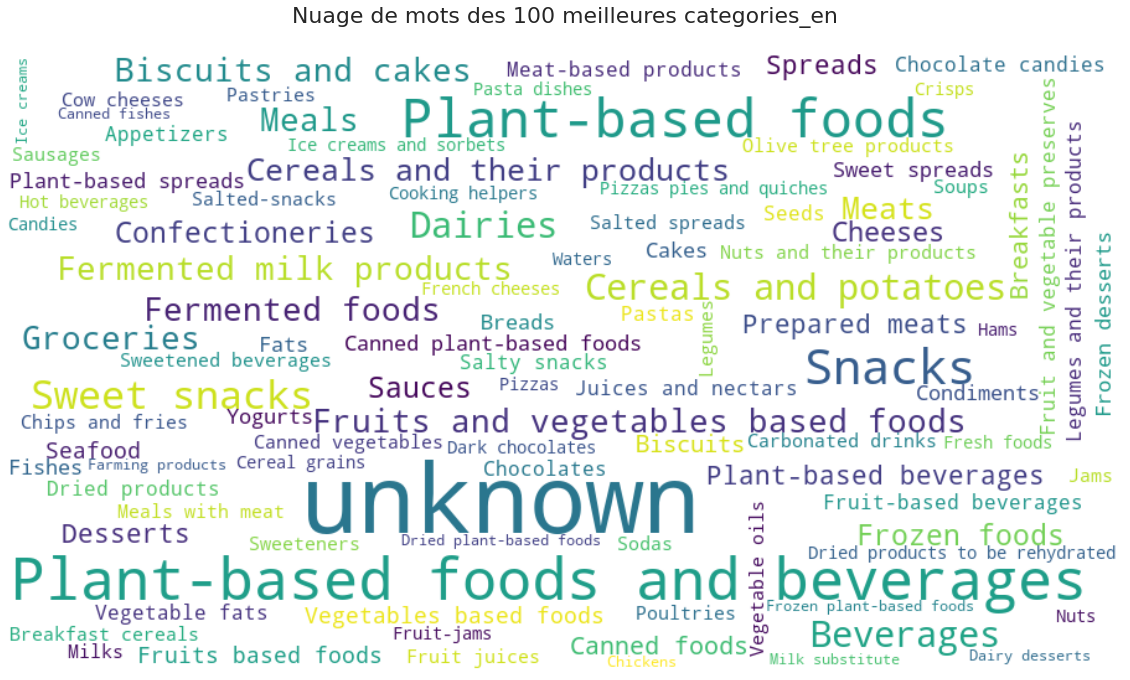

In [ ]:
plot_world_cloud(df=datas,column="categories_en",nb_top=100)

Passons à présent aux variables `pnns_groups_1` et `pnns_groups_2` qui nous apporteront des informations plus précises :

In [ ]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

14 catégories sont représentées dans la variable pnns_group_1.
46 catégories sont représentées dans la variable pnns_group_2.


In [ ]:
pnns_groups_1

['unknown',
 'fruits-and-vegetables',
 'Milk and dairy products',
 'salty-snacks',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'sugary-snacks',
 'cereals-and-potatoes',
 'Sugary snacks',
 'Cereals and potatoes',
 'Salty snacks',
 'Fat and sauces',
 'Beverages',
 'Composite foods']

On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :
- 'Cereals and potatoes' et 'cereals-and-potatoes'
- 'fruits-and-vegetables' et 'Fruits and vegetables'
- ...

Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :

In [ ]:
datas["pnns_groups_1"] = datas["pnns_groups_1"].str.lower().str.replace('-', ' ')

In [ ]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print(pnns_groups_1)

10 catégories sont représentées dans la variable pnns_group_1.
['unknown', 'fat and sauces', 'cereals and potatoes', 'fish meat eggs', 'milk and dairy products', 'fruits and vegetables', 'composite foods', 'sugary snacks', 'salty snacks', 'beverages']


In [ ]:
pnns_groups_2

['unknown',
 'Fish and seafood',
 'Breakfast cereals',
 'Biscuits and cakes',
 'Cereals',
 'Dried fruits',
 'Fruits',
 'Eggs',
 'Sandwiches',
 'Vegetables',
 'Alcoholic beverages',
 'Ice cream',
 'Fruit nectars',
 'Fats',
 'Unsweetened beverages',
 'Pizza pies and quiche',
 'legumes',
 'Plant-based milk substitutes',
 'vegetables',
 'Offals',
 'Sweetened beverages',
 'Appetizers',
 'cereals',
 'Sweets',
 'Legumes',
 'Artificially sweetened beverages',
 'Milk and yogurt',
 'Chocolate products',
 'Waters and flavored waters',
 'Nuts',
 'pastries',
 'Fruit juices',
 'Salty and fatty products',
 'Cheese',
 'Dairy desserts',
 'Teas and herbal teas and coffees',
 'Bread',
 'Processed meat',
 'Soups',
 'Meat',
 'fruits',
 'nuts',
 'Potatoes',
 'One-dish meals',
 'Dressings and sauces',
 'Pizza pies and quiches']

In [ ]:
datas["pnns_groups_2"] = datas["pnns_groups_2"].str.lower().str.replace('-', ' ').replace('pizza pies and quiche','pizza pies and quiches')
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

40 catégories sont représentées dans la variable pnns_group_2.


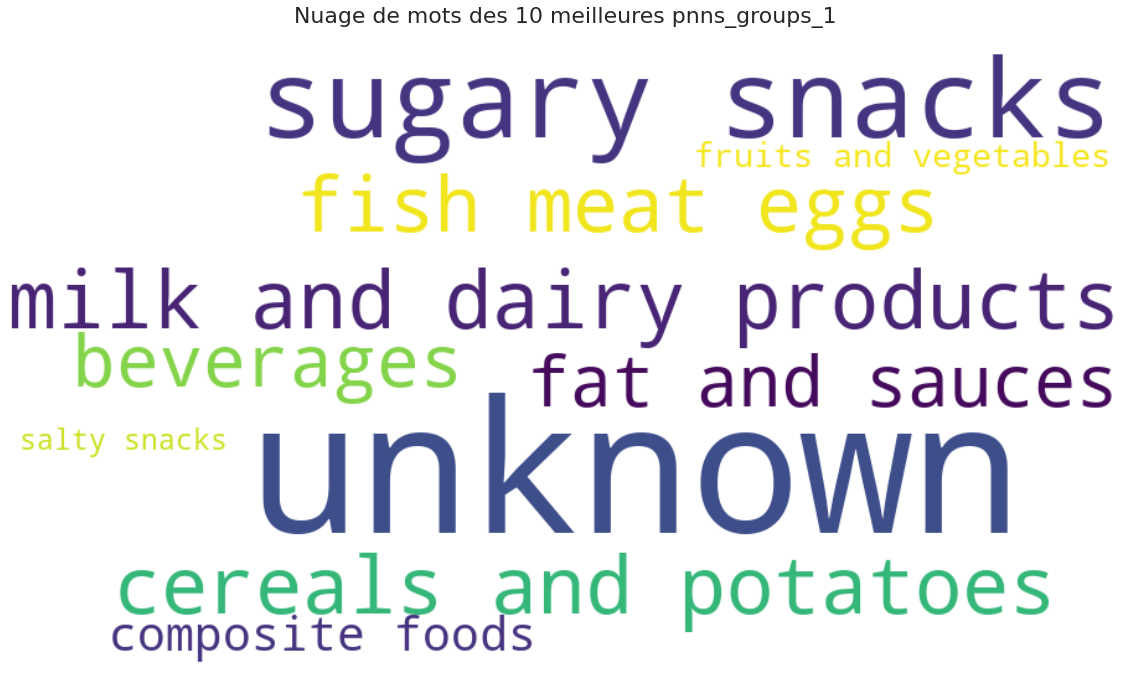

In [ ]:
plot_world_cloud(df=datas,column="pnns_groups_1",nb_top=10)

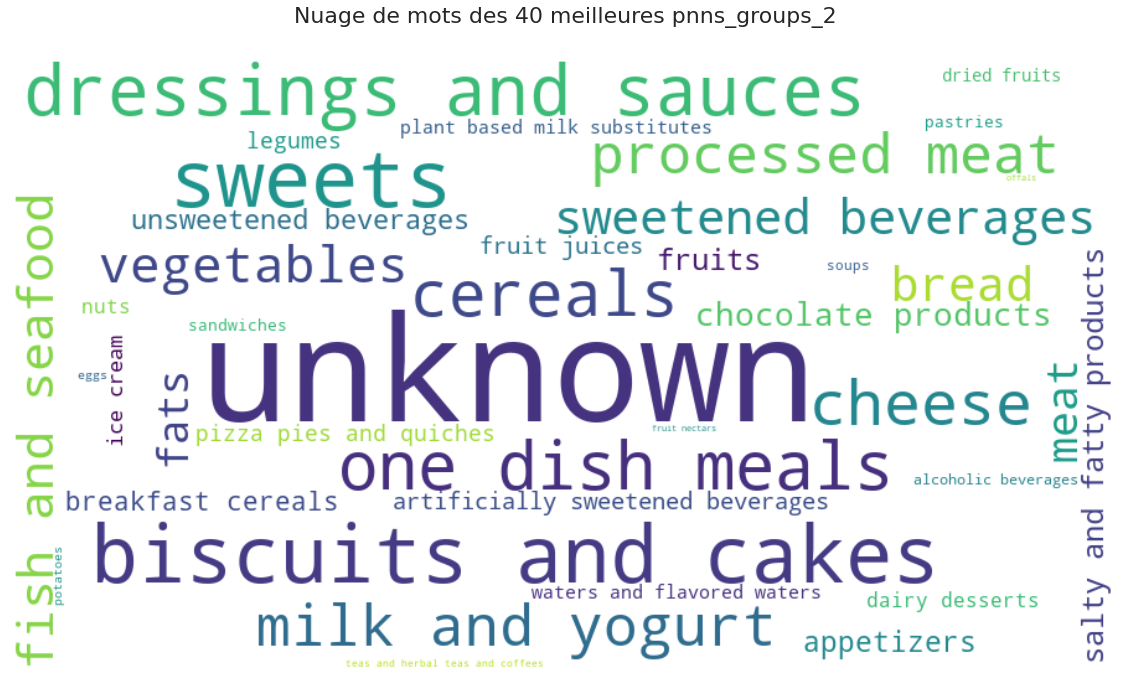

In [ ]:
plot_world_cloud(df=datas,column="pnns_groups_2",nb_top=len(pnns_groups_2))

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124710 entries, 943812 to 1114460
Data columns (total 40 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   code                                     1124710 non-null  object        
 1   states_en                                1124710 non-null  object        
 2   url                                      1124710 non-null  object        
 3   created_datetime                         1124710 non-null  datetime64[ns]
 4   last_modified_datetime                   1124710 non-null  datetime64[ns]
 5   creator                                  1124708 non-null  object        
 6   pnns_groups_2                            1124710 non-null  object        
 7   countries_en                             1124710 non-null  object        
 8   pnns_groups_1                            1124710 non-null  object        
 9   product_

### <font color="#ea1c60" id="section_5">1.5. Compléter les valeurs manquantes ou aberrantes</font>

Le jeu de données est nettoyé mais comme le montre les informations ci-dessus, il reste un grand nombre de valeurs manquantes qu'il va falloir compléter mais également des outliers à identifier.

Regardons dans un premier temps une rapide description du Dataset :

In [ ]:
datas.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  1.103615e+06   1.097421e+06  1.096518e+06        1.096167e+06   
mean   6.039750e+36   8.392915e+00  1.446340e+01        2.997891e+01   
std    6.344944e+39   1.654728e+02  9.638410e+02        7.377683e+02   
min    0.000000e+00  -5.000000e+02  0.000000e+00        0.000000e+00   
25%    4.180000e+02   1.200000e+00  7.000000e-01        4.050000e+00   
50%    1.088000e+03   5.800000e+00  6.800000e+00        1.700000e+01   
75%    1.674000e+03   1.170000e+01  2.100000e+01        5.400000e+01   
max    6.665559e+42   1.730000e+05  9.999990e+05        7.629390e+05   

        sugars_100g     salt_100g   sodium_100g  saturated-fat_100g  \
count  1.081283e+06  1.062815e+06  1.062811e+06        1.061298e+06   
mean   1.386367e+01  2.108993e+00  8.436421e-01        1.448704e+01   
std    2.099702e+01  1.221210e+02  4.884708e+01        9.706938e+03   
min   -1.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
25%    8.000000e-01  6.250000e-02  2.500000e-02        1.000000e-01   
50%    4.000000e+00  5.300000e-01  2.120000e-01        1.800000e+00   
75%    2.000000e+01  1.312500e+00  5.250000e-01        7.020000e+00   
max    6.880000e+03  7.900700e+04  3.160280e+04        9.999999e+06   

       energy-kcal_100g  ingredients_that_may_be_from_palm_oil_n  \
count      1.053235e+06                            546131.000000   
mean       8.254711e+06                                 0.073116   
std        8.471294e+09                                 0.311127   
min        0.000000e+00                                 0.000000   
25%        1.000000e+02                                 0.000000   
50%        2.630000e+02                                 0.000000   
75%        4.000000e+02                                 0.000000   
max        8.693855e+12                                 6.000000   

       ingredients_from_palm_oil_n    additives_n  nutrition-score-fr_100g  \
count                546131.000000  546131.000000            532527.000000   
mean                      0.023346       2.078034                 9.187033   
std                       0.152952       2.924924                 8.893926   
min                       0.000000       0.000000               -15.000000   
25%                       0.000000       0.000000                 2.000000   
50%                       0.000000       1.000000                10.000000   
75%                       0.000000       3.000000                16.000000   
max                       3.000000      39.000000                40.000000   

       nutriscore_score     nova_group     fiber_100g  serving_quantity  
count     532527.000000  482631.000000  400048.000000      3.814900e+05  
mean           9.187033       3.460772       3.040423      1.818687e+05  
std            8.893926       0.933034       6.389704      1.111470e+08  
min          -15.000000       1.000000     -20.000000      0.000000e+00  
25%            2.000000       3.000000       0.000000      2.800000e+01  
50%           10.000000       4.000000       1.600000      5.000000e+01  
75%           16.000000       4.000000       3.600000      1.130000e+02  
max           40.000000       4.000000    2020.000000      6.864646e+10

On remarque déjà que les valeurs minimum et maximum de **certaines variables** (comme les nutriments ou la valeur energetique) **peuvent contenir des valeurs aberrantes**, ce qui impacte également l'écart-type et donc la variance.

In [ ]:
datas[datas['energy_100g'] == datas['energy_100g'].max()]

code                                          states_en  \
574005  2558888  To be completed,Nutrition facts completed,Ingr...   

                                                      url    created_datetime  \
574005  http://world-en.openfoodfacts.org/product/2558888 2019-07-19 21:09:11   

       last_modified_datetime                     creator pnns_groups_2  \
574005    2019-07-19 21:11:47  openfoodfacts-contributors       unknown   

       countries_en pnns_groups_1 product_name  ...  \
574005     Bulgaria       unknown          NaN  ...   

        image_ingredients_small_url  image_ingredients_url  \
574005                          NaN                    NaN   

        nutrition-score-fr_100g  nutriscore_score  nutriscore_grade  \
574005                      NaN               NaN               NaN   

        nova_group  fiber_100g  serving_size  serving_quantity quantity  
574005         NaN         NaN           NaN               NaN      NaN  

[1 rows x 40 columns]

Ici, ce produit qui possède la plus grande valeur energétique n'est quasi pas complété. Le manque le nom du produit, les catégories et toutes les valeurs nutritionnelles. Nous allons **supprimer tous les produits qui n'ont ni nom, ni catégorie** et qui ne pourront donc être clairement identifiés.

In [ ]:
datas_cleaned = datas[~((datas.product_name.isnull())
                        & ((datas.pnns_groups_1 == "unknown")
                           | (datas.main_category_en == "unknown")))]

In [ ]:
datas_cleaned[((datas_cleaned.pnns_groups_1 == "unknown") & (datas_cleaned.main_category_en == "unknown") &
              (datas_cleaned.pnns_groups_2 == "unknown") & (datas_cleaned.categories_en == "unknown"))].shape[0]

510484

Il reste tout de même **510 484 produits qui ne contiennent aucune indication de catégorie**.

Afin de pouvoir calculer des indicateurs empiriques correctes, nous allons remplacer par des valeurs nulles tous les max et min aberrants *(0, -1 ou 999999...)* :

In [ ]:
#On repère les numerical_features
numerical_features = list(datas_cleaned.select_dtypes(include=["float64","int64"]).columns)
#On supprime les nutriscores qui eux peuvent être négatifs
numerical_features.remove('nutriscore_score')
numerical_features.remove('nutrition-score-fr_100g')
numerical_features.remove('ingredients_that_may_be_from_palm_oil_n')
numerical_features.remove('ingredients_from_palm_oil_n')
numerical_features.remove('nova_group')

In [ ]:
#On supprime les lignes dont toutes les numerical_features sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_features]==0) | (datas_cleaned[numerical_features].isnull())).all(axis=1)]

In [ ]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features].isin([999999,9999999])).any(axis=1)]

Les variables suffixées avec `_100g` nous indiquent la quantité de nutriment pour 100 grammes de produit. Les valeurs renseignées ne peuvent donc logiquement pas excéder 100. Nous allons donc **supprimer les lignes dont au moins 1 des variables de nutriments est supérieur au seuil** :

In [ ]:
g_per_100g_features = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'sodium_100g','saturated-fat_100g','fiber_100g']
datas_cleaned = datas_cleaned[~(datas_cleaned[g_per_100g_features] > 100).any(axis=1)]

D'autre part, les valeurs de `saturated-fat_100g` ne peuvent pas être supérieurs à `fat_100g`, de même pour les valeurs de `sodium_100g` qui ne peuvent pas être supérieurs à `salt_100g`.     
Nous allons donc supprimer les lignes qui remplissent ces conditions :

In [ ]:
datas_cleaned = datas_cleaned[~((datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g'])
                                | (datas_cleaned['sodium_100g'] > datas_cleaned['salt_100g']))]

Enfin, les densité d'energie maximales pour 100g sont de 3700 kJ/100g *(source [Wikipedia](https://en.wikipedia.org/wiki/Food_energy))*. Nous allons donc supprimer toutes les lignes dont la variable `energy_100g` est supérieur à 3700 *(ou 900 kcal/100g)*.

In [ ]:
datas_cleaned = datas_cleaned[~((datas_cleaned['energy_100g'] > 3700)
                                | (datas_cleaned['energy-kcal_100g'] > 900))]

Pour les variables restantes, nous allons nous baser sur la médiane et l'écart-type pour éliminer les outliers. Commençons par afficher la dispersion des données et ces métriques :

In [ ]:
sigma_features = ['additives_n','serving_quantity']

In [ ]:
#On initialise l'écart-type et la médiane
sigma = [0 for _ in range(len(sigma_features))]
median = [0 for _ in range(len(sigma_features))]
#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(sigma_features)):
  median[i] = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]].median()
  serie = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]]
  serie = serie.sort_values()
  sigma[i] = np.std(serie[:-25])

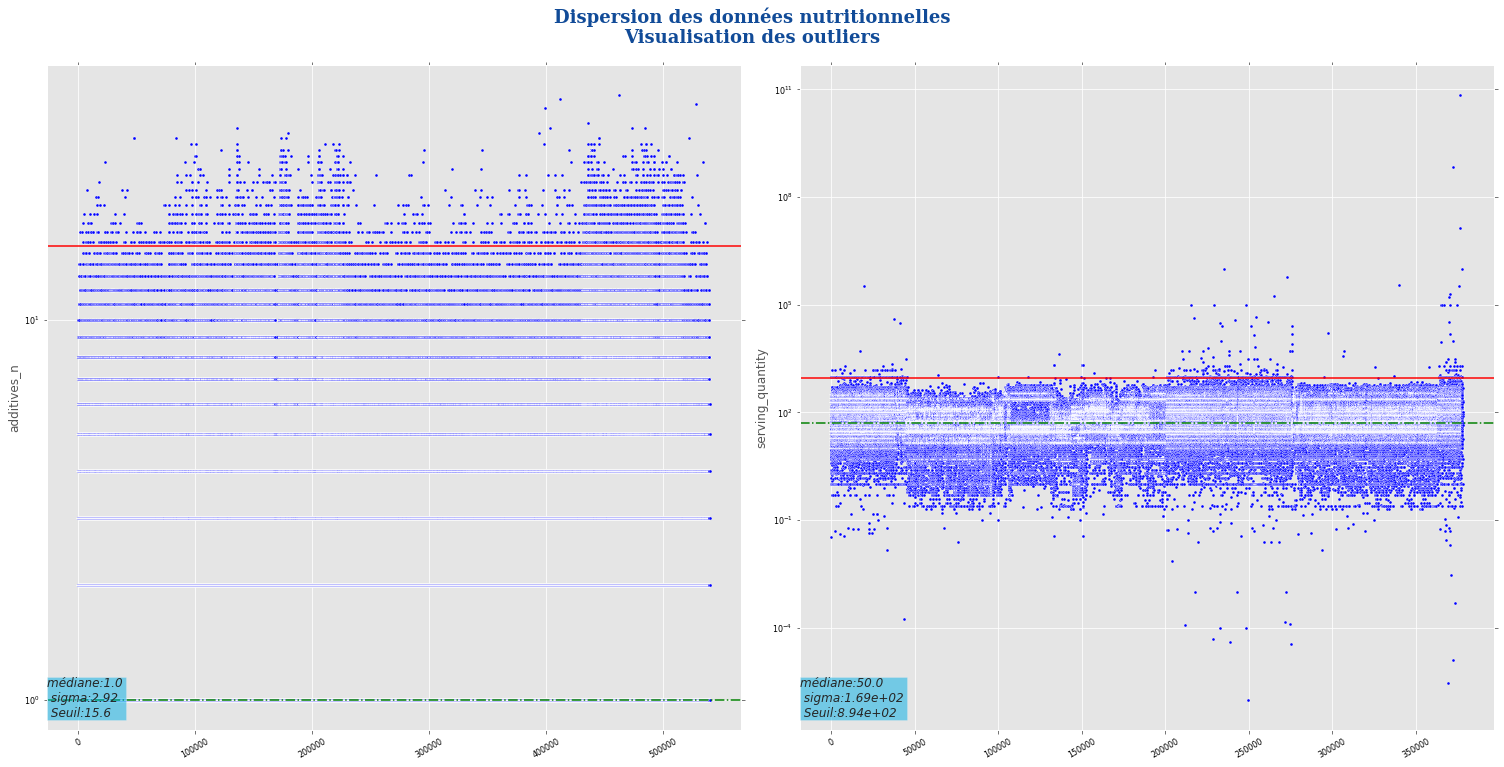

In [ ]:
plt.style.use('ggplot')
tPlot, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(21,10))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = sigma_features[i]
    test = datas_cleaned[pd.notnull(datas_cleaned[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=median[i], color='g', linestyle='dashdot')
    ax.axhline(y=median[i] + 5*sigma[i], color='r', linestyle='-')
    ax.text(0., 0.02, 'médiane:{:.3} \n sigma:{:.3} \n Seuil:{:.3}'.format(median[i], sigma[i], (median[i] + 5*sigma[i])),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, r"Dispersion des données nutritionnelles" "\n" "Visualisation des outliers", ha='center', fontdict=font_title)
plt.tight_layout()

Ces représentations nous indiquent clairement les éventuels **outliers qui diffèrent de la valeur médiane de plus de 5 fois l'écart-type ($5\sigma$ - valeur sélectionnée après plusieurs essais)**.

In [ ]:
for i in range(len(sigma_features)):
    col = sigma_features[i]
    threshold = (median[i] + 5*sigma[i])
    print('{:30}: suppression de la ligne si valeur > {}'.format(col, round(threshold,3)))
    mask = datas_cleaned[col] > threshold
    datas_cleaned = datas_cleaned.drop(datas_cleaned[mask].index)

additives_n                   : suppression de la ligne si valeur > 15.622
serving_quantity              : suppression de la ligne si valeur > 894.119


In [ ]:
datas_cleaned.shape

(1079102, 40)

In [ ]:
datas_cleaned.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  1.074291e+06   1.072820e+06  1.071766e+06        1.071496e+06   
mean   1.128804e+03   8.315258e+00  1.306623e+01        2.942527e+01   
std    7.688951e+02   9.547139e+00  1.625646e+01        2.809388e+01   
min    0.000000e+00   0.000000e+00  0.000000e+00        0.000000e+00   
25%    4.310000e+02   1.400000e+00  7.803125e-01        4.400000e+00   
50%    1.092000e+03   5.900000e+00  6.800000e+00        1.739000e+01   
75%    1.674000e+03   1.190000e+01  2.100000e+01        5.450000e+01   
max    3.700000e+03   1.000000e+02  1.000000e+02        1.000000e+02   

        sugars_100g     salt_100g   sodium_100g  saturated-fat_100g  \
count  1.054503e+06  1.029736e+06  1.029732e+06        1.033059e+06   
mean   1.400711e+01  1.368224e+00  5.472933e-01        4.997245e+00   
std    1.986102e+01  4.947573e+00  1.979092e+00        7.450864e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00        0.000000e+00   
25%    9.000000e-01  8.250000e-02  3.300000e-02        1.000000e-01   
50%    4.100000e+00  5.700000e-01  2.280000e-01        1.800000e+00   
75%    2.000000e+01  1.355000e+00  5.420000e-01        7.000000e+00   
max    1.000000e+02  1.000000e+02  4.000000e+01        1.000000e+02   

       energy-kcal_100g  ingredients_that_may_be_from_palm_oil_n  \
count      1.025126e+06                            536327.000000   
mean       2.708450e+02                                 0.071318   
std        1.839316e+02                                 0.305941   
min        0.000000e+00                                 0.000000   
25%        1.040000e+02                                 0.000000   
50%        2.634500e+02                                 0.000000   
75%        4.000000e+02                                 0.000000   
max        9.000000e+02                                 6.000000   

       ingredients_from_palm_oil_n    additives_n  nutrition-score-fr_100g  \
count                536327.000000  536327.000000            522952.000000   
mean                      0.023381       2.010440                 9.172811   
std                       0.153000       2.670376                 8.891499   
min                       0.000000       0.000000               -15.000000   
25%                       0.000000       0.000000                 2.000000   
50%                       0.000000       1.000000                10.000000   
75%                       0.000000       3.000000                16.000000   
max                       3.000000      15.000000                40.000000   

       nutriscore_score     nova_group     fiber_100g  serving_quantity  
count     522952.000000  474656.000000  392946.000000     374568.000000  
mean           9.172811       3.469195       3.033650         88.320734  
std            8.891499       0.922869       4.913816         93.987317  
min          -15.000000       1.000000       0.000000          0.000000  
25%            2.000000       3.000000       0.000000         28.000000  
50%           10.000000       4.000000       1.600000         50.000000  
75%           16.000000       4.000000       3.600000        113.000000  
max           40.000000       4.000000     100.000000        875.000000

Après ces quelques opérations de nettoyage, les valeurs médianes, d'écarts-type, de minimum et maximum sont plus cohérentes. Nous allons pouvoir exploiter ces données pour **estimer les valeurs manquantes**.

Nous allons déjà regarder la **distribution de ces variables et définir si elles suivent une loi normale**, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

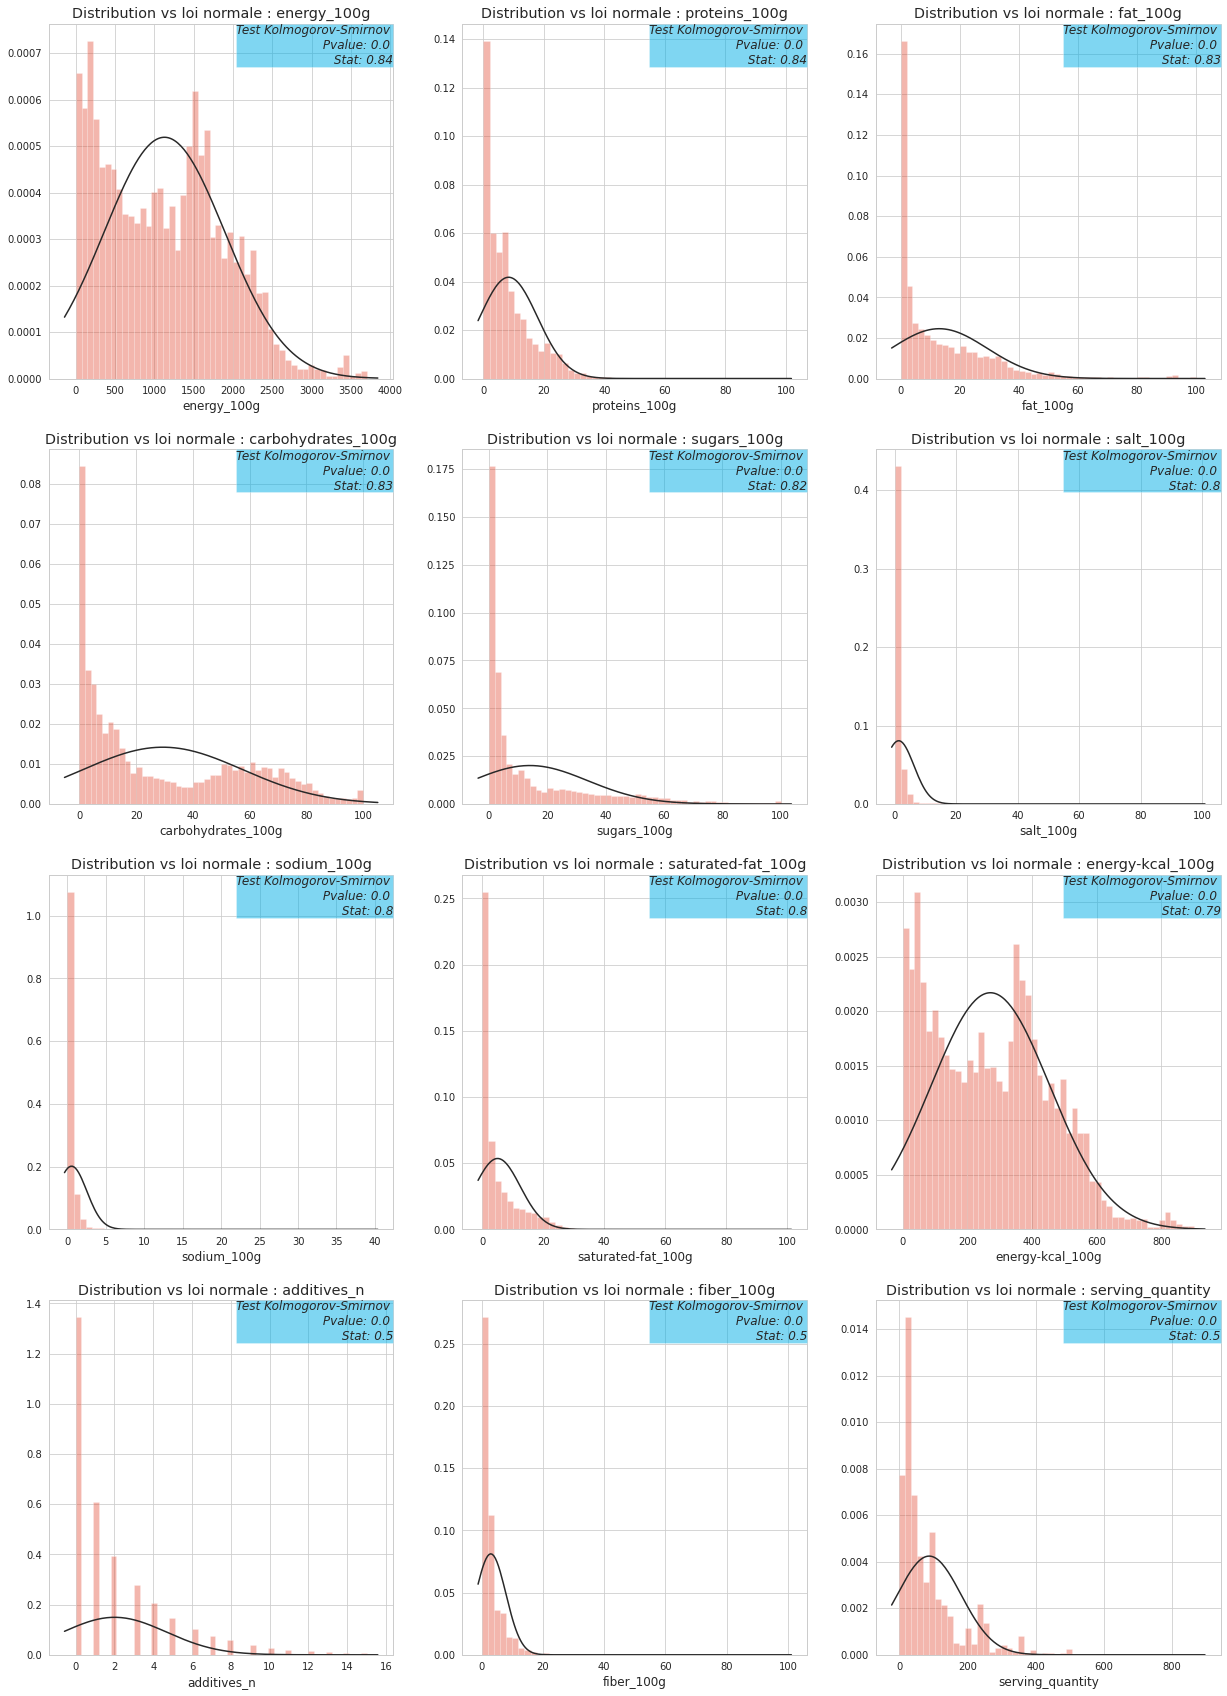

In [ ]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)

    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height

    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) **on rejette donc l'hypothèse de normalité des distributions de ces variables**. Il serait donc inexacte d'imputer les valeurs manquantes par la moyenne.

Pour confirmer cette approche, regardons à présent quelque unes de ces distributions en fonction de la catégorie `pnns_groups_1` :

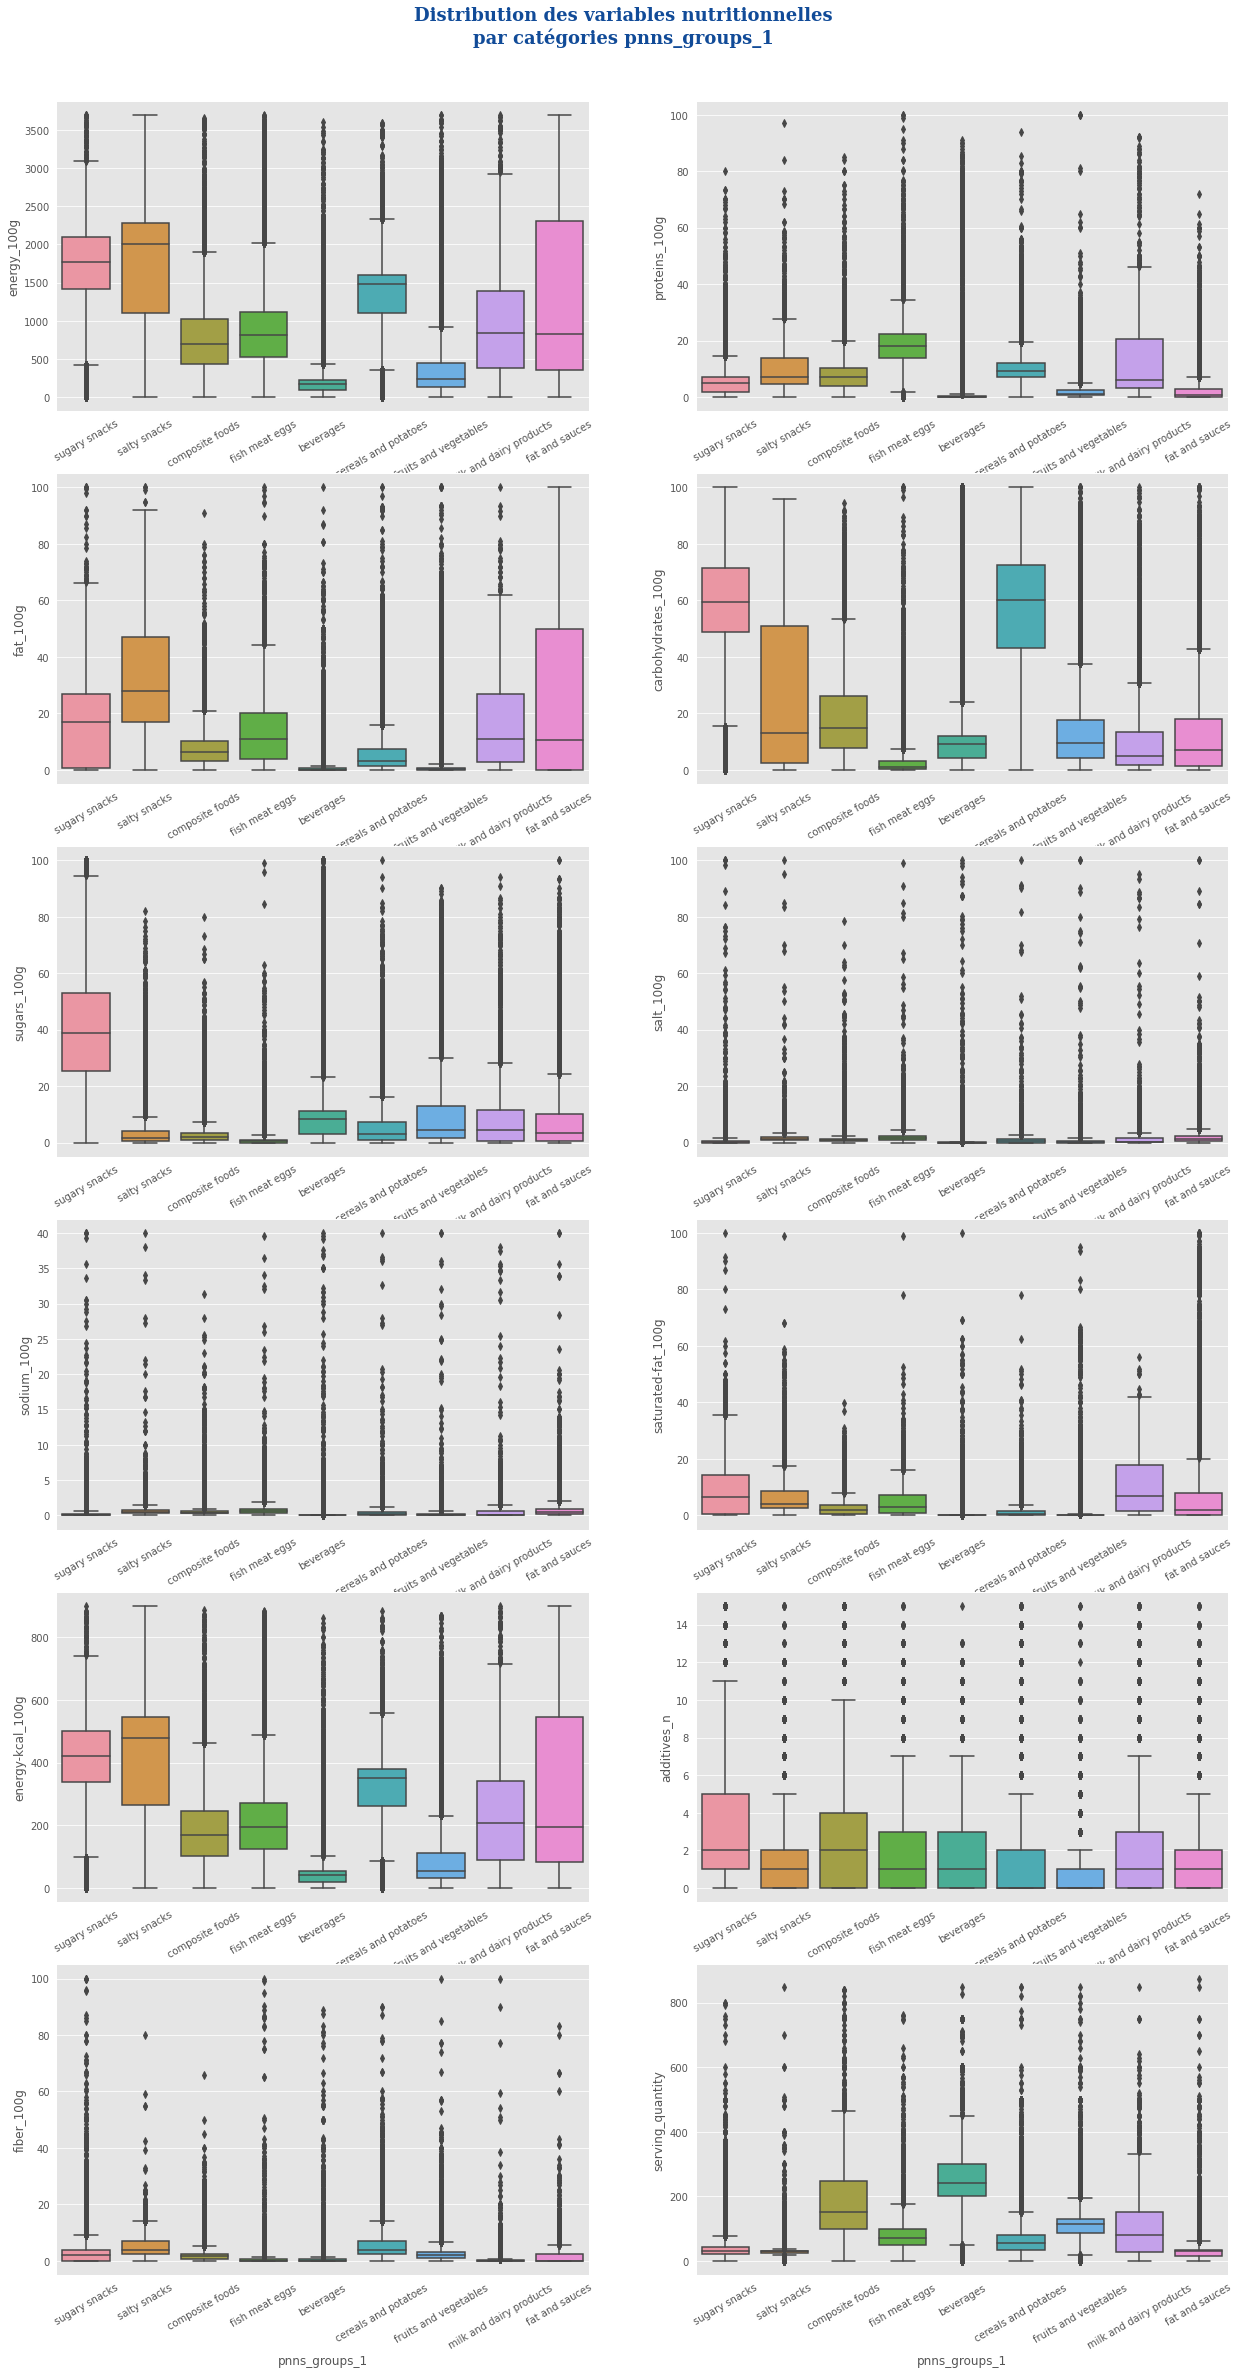

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center",
         fontdict=font_title)
plt.show()

Si l'on regarde la distribution de quelques unes de ces mêmes variables sur la catégorie `pnns_groups_2` :

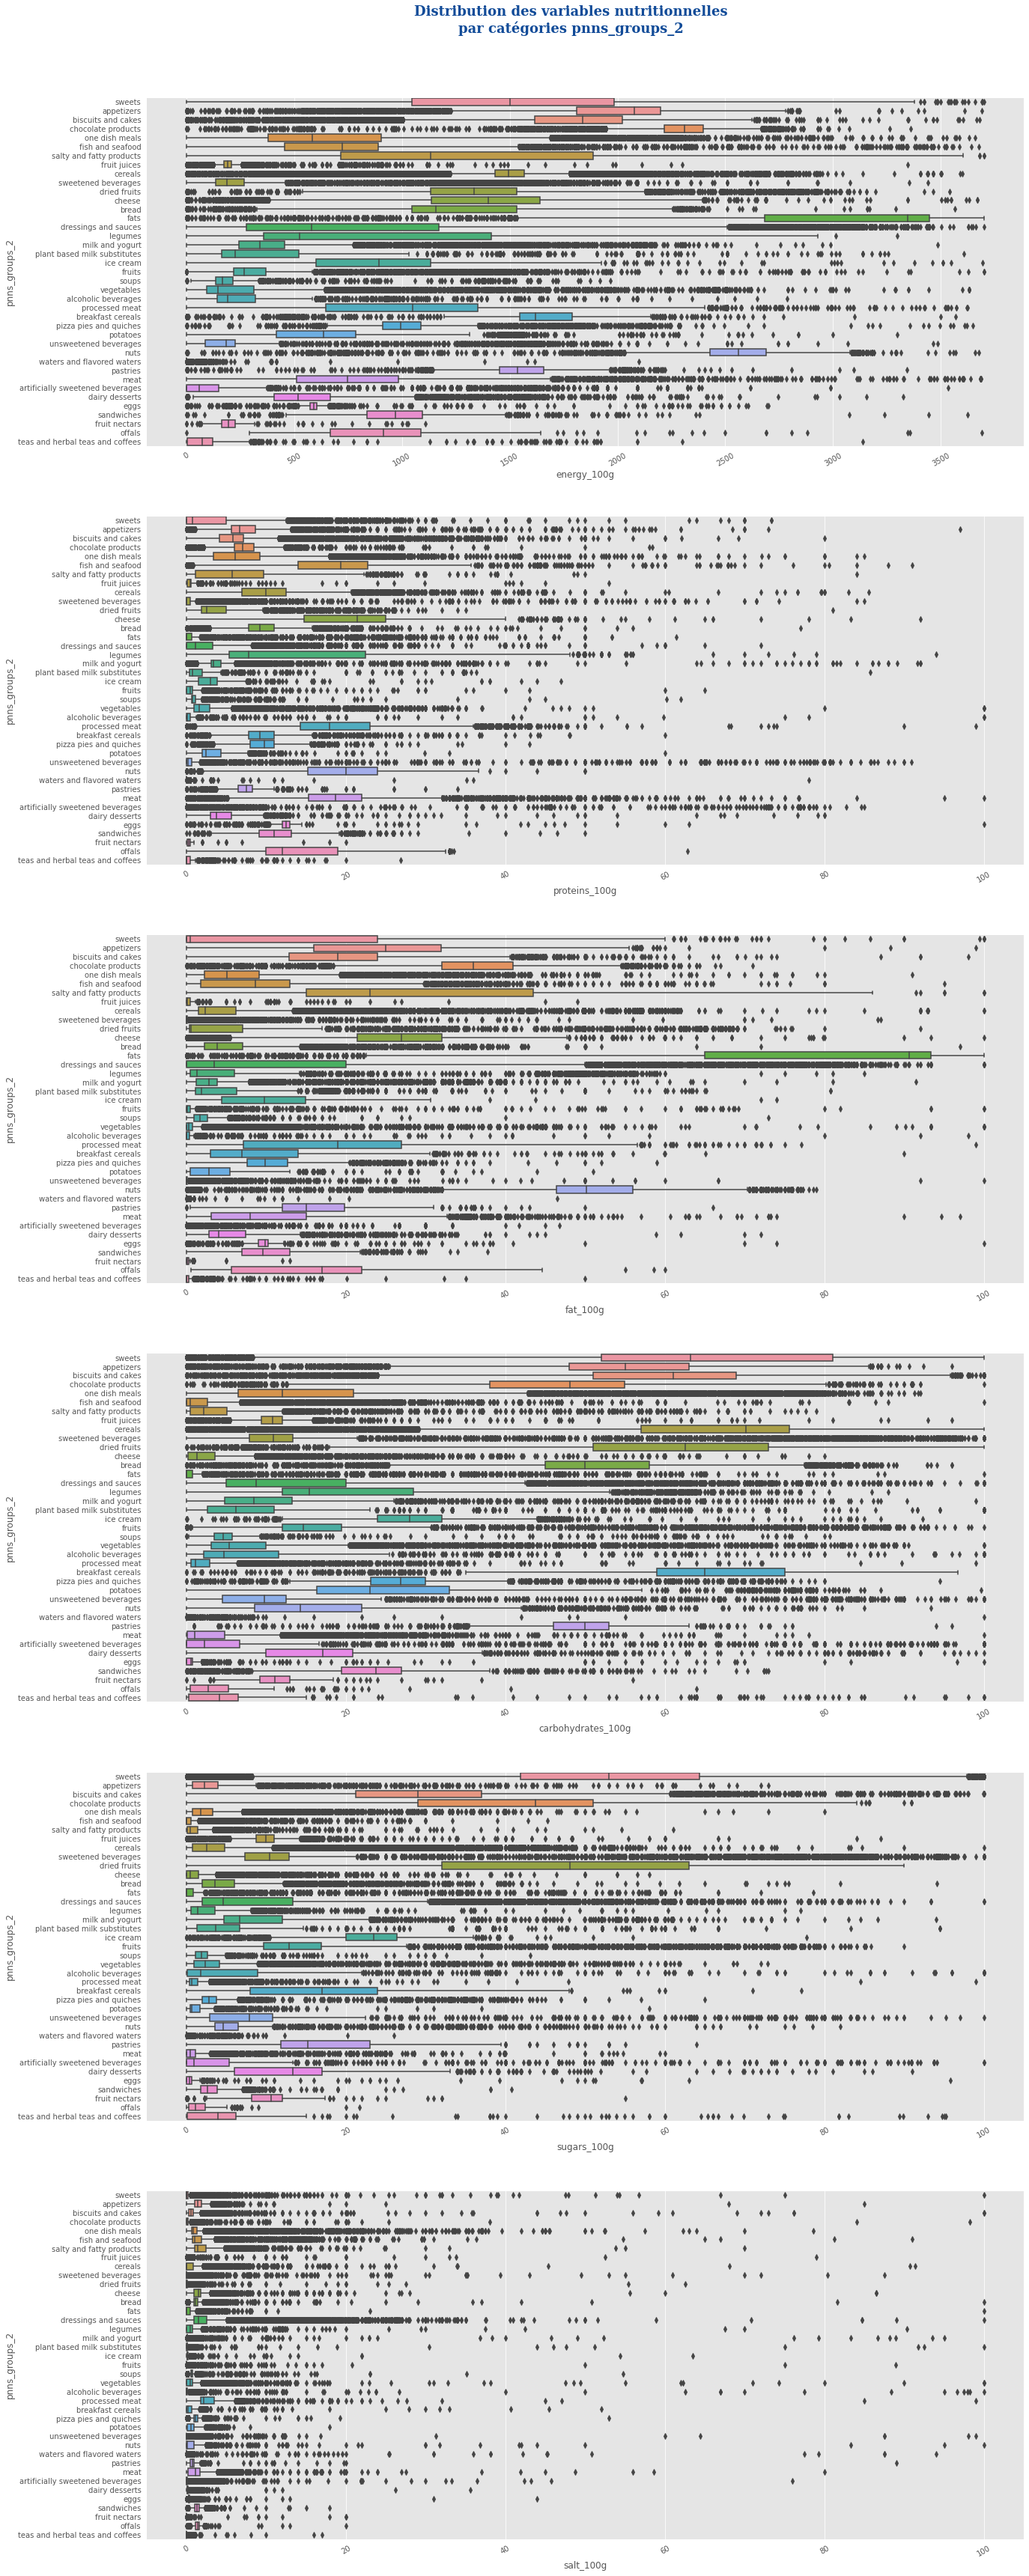

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_features[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="pnns_groups_2", x=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_2"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center",
         fontdict=font_title)
plt.show()

In [ ]:
datas_cleaned[numerical_features].isnull().sum()

energy_100g             4811
proteins_100g           6282
fat_100g                7336
carbohydrates_100g      7606
sugars_100g            24599
salt_100g              49366
sodium_100g            49370
saturated-fat_100g     46043
energy-kcal_100g       53976
additives_n           542775
fiber_100g            686156
serving_quantity      704534
dtype: int64

Pour ces valeurs nulles ci-dessus, les variables `serving_quantity` et `additives_n` sont très peu renseignées, nous allons donc les supprimer de notre jeu de données.     
`fiber_100g` est également mal renseigné mais nous en aurons besoin pour la suite. Nous allons donc compléter les valeurs nulles par la **médiane de la catégorie** `pnns_groups_2`.     
Enfin, pour les autres variables, avec peu de null et dont les distributions ne suivent pas la loi gaussiene, nous allons imputer avec l'**algorithme des K Nearest Neighbours** (KNN).

In [ ]:
#On supprime les 2 colonnes les moins complétées et la variable redondante energie
datas_cleaned.drop(['serving_quantity','additives_n','energy-kcal_100g'], axis=1, inplace=True)

In [ ]:
numerical_features.remove('serving_quantity')
numerical_features.remove('additives_n')
numerical_features.remove('energy-kcal_100g')

In [ ]:
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = ['energy_100g','proteins_100g','saturated-fat_100g','sugars_100g','salt_100g']
sample_datas = datas_cleaned[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [ ]:
# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(datas_cleaned[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [ ]:
for col_knn in knn_features:
    datas_cleaned[col_knn] = df_datas_imputed[col_knn].values

In [ ]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in ['carbohydrates_100g','sodium_100g','fat_100g','fiber_100g']:
    datas_cleaned[col] = datas_cleaned.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))

Les valeurs manquantes étant à présent toutes complétées pour ces variables numériques, nous allons vérifier que les distributions n'ont pas changées :

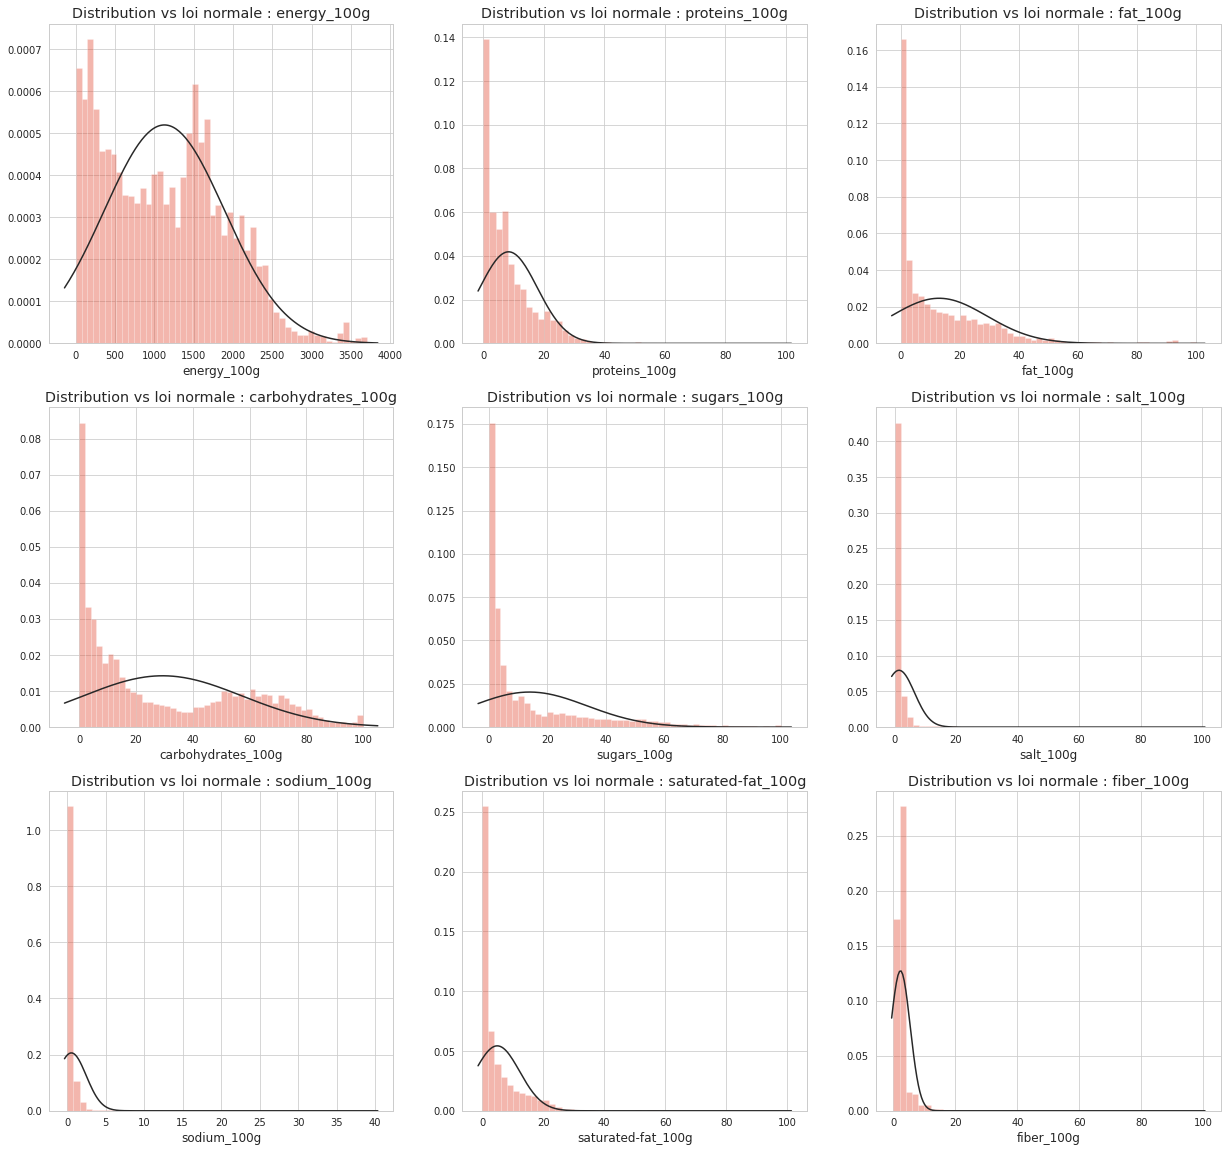

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(3,3,i+1)
    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
plt.show()

Les variables imputées étant bien distribuées conformément aux variables d'origine, nous allons à présent **supprimer les dernières variables non pertinentes**, peu renseignées ou inutiles dans nos futurs modèles :

In [ ]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

quantity                                   765730
serving_size                               700569
image_ingredients_url                      611212
image_ingredients_small_url                611212
nova_group                                 604446
nutriscore_grade                           556150
nutriscore_score                           556150
nutrition-score-fr_100g                    556150
ingredients_text                           542775
ingredients_from_palm_oil_n                542775
ingredients_that_may_be_from_palm_oil_n    542775
image_nutrition_url                        467258
image_nutrition_small_url                  467258
brands                                     396301
image_small_url                            289551
image_url                                  289551
product_name                                 1431
creator                                         2
sodium_100g                                     0
url                                             0


In [ ]:
deleted_features = ['brands','serving_size','nova_group','image_ingredients_small_url',
                    'image_ingredients_url','ingredients_text','ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n','image_nutrition_url','image_nutrition_small_url',
                    'image_url','image_small_url', 'nutrition-score-fr_100g','quantity']
datas_cleaned.drop(deleted_features, axis=1, inplace=True)

### <font color="#ea1c60" id="section_6">1.6. Calcul des Nutri-Scores manquants</font>

Une des variables primoridale de ce jeu de données est le Nutriscore. Or, cette variable compte beaucoup de manquants.
Afin de calculer ce nutriscore, nous avons besoin de plusieurs autres variables.

Le score prend en comptepour 100g de produit, la teneur :
- En nutriments et aliments à favoriser (fibres, protéines, fruits et légumes),
- En nutriments à limiter (énergie, acide gras saturés, sucres, sel).

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.
Voici un tableau simplifié permettant de calculer l'attribution des points :

<table width="100%" style="border:solid 1px; text-align:center;" align="center">
    <thead style="border:solid 1px; text-align:center;">
        <th bgcolor="#feadb3"><b>Points</b></th>
        <th bgcolor="#feadb3">Energie (kJ)</th>
        <th bgcolor="#feadb3">Sucres simples (g)</th>
        <th bgcolor="#feadb3">Acide gras saturés (g)</th>
        <th bgcolor="#feadb3">Sodium (mg)</th>
        <th bgcolor="#b6faa3"><b>Points</b></th>
        <th bgcolor="#b6faa">Fruits,leg(%)</th>
        <th bgcolor="#b6faa">Fibres (g)</th>
        <th bgcolor="#b6faa">Protéines (g)</th>
    </thead>
    <tbody>
        <tr>
            <td bgcolor="#feadb3"><b>0</b></td>
            <td bgcolor="#feadb3">$\leq$ 335</td>
            <td bgcolor="#feadb3">$\leq$ 4,5</td>
            <td bgcolor="#feadb3">$\leq$ 1</td>
            <td bgcolor="#feadb3">$\leq$ 90</td>
            <td bgcolor="#b6faa"><b>0</b></td>
            <td bgcolor="#b6faa">$\leq$ 40</td>
            <td bgcolor="#b6faa">$\leq$ 0,7</td>
            <td bgcolor="#b6faa">$\leq$ 1,6</td>
        </tr>
        <tr>
            <td bgcolor="#feadb3"><b>5</b></td>
            <td bgcolor="#feadb3">$>$ 335</td>
            <td bgcolor="#feadb3">$>$ 4,5</td>
            <td bgcolor="#feadb3">$>$ 1</td>
            <td bgcolor="#feadb3">$>$ 90</td>
            <td bgcolor="#b6faa"><b>-2</b></td>
            <td bgcolor="#b6faa">$>$ 40</td>
            <td bgcolor="#b6faa">$>$ 0,7</td>
            <td bgcolor="#b6faa">$>$ 1,6</td>
        </tr>
        <tr>
            <td bgcolor="#feadb3"><b>10</b></td>
            <td bgcolor="#feadb3">$>$ 1675</td>
            <td bgcolor="#feadb3">$>$ 22,5</td>
            <td bgcolor="#feadb3">$>$ 5</td>
            <td bgcolor="#feadb3">$>$ 450</td>
            <td bgcolor="#b6faa"><b>-5</b></td>
            <td bgcolor="#b6faa">$>$ 80</td>
            <td bgcolor="#b6faa">$>$ 3,5</td>
            <td bgcolor="#b6faa">$>$ 8</td>
        </tr>
        <tr style="border:solid 1px; text-align:center;">
            <td> </td>
            <td>(a)</td>
            <td>(b)</td>
            <td>(c)</td>
            <td>(d)</td>
            <td> </td>
            <td>(e)</td>
            <td>(f)</td>
            <td>(g)</td>
        </tr>
        <tr>
            <td><b>Total</b></td>
            <td colspan="8"><b>(a) + (b) + (c) + (d) + (e) + (f) + (g)</b></td>
        </tr>
    </tbody>
</table>

Attribution des classes *(version simplifiée)* :

<table width="50%" style="border:solid 1px; text-align:center;" align="center">
    <thead>
        <th>Aliment solide</th>
        <th>Lettre</th>
        <th>Couleur</th>
    </thead>
    <tbody>
        <tr>
            <td>Mimimum -1</td>
            <td>A</td>
            <td>Vert foncé</td>
        </tr>
        <tr>
            <td>0 à 5</td>
            <td>B</td>
            <td>Vert</td>
        </tr>
        <tr>
            <td>5 à 10</td>
            <td>C</td>
            <td>Jaune</td>
        </tr>
        <tr>
            <td>10 à 20</td>
            <td>D</td>
            <td>Orange</td>
        </tr>
        <tr>
            <td>20 et plus</td>
            <td>E</td>
            <td>Orange foncé</td>
        </tr>
    </tbody>
</table>

Nous allons donc **isoler les variables nécessaires au calcul du Nutriscore et vérifier leur taux de remplissage** :

In [ ]:
nutriscore_features = ['pnns_groups_1', 'pnns_groups_2', 'nutriscore_grade', 'nutriscore_score',
                       'energy_100g','sugars_100g','saturated-fat_100g','sodium_100g', 'fiber_100g', 'proteins_100g']
datas_cleaned[nutriscore_features].sample(10)

pnns_groups_1    pnns_groups_2 nutriscore_grade  \
1244519                  unknown          unknown              NaN   
207142                   unknown          unknown                c   
1271553                  unknown          unknown              NaN   
880299   milk and dairy products           cheese                e   
1082962  milk and dairy products  milk and yogurt                e   
1090149            sugary snacks           sweets              NaN   
1055930            sugary snacks           sweets                d   
405979                   unknown          unknown                d   
604905     fruits and vegetables           fruits                a   
398762                   unknown          unknown              NaN   

         nutriscore_score  energy_100g  sugars_100g  saturated-fat_100g  \
1244519               NaN       1452.0         2.60                0.80   
207142               10.0        904.0         2.27                5.11   
1271553               NaN       1778.0        22.40                6.80   
880299               19.0       1669.0         1.50               18.00   
1082962              27.0       2351.0        41.20               16.10   
1090149               NaN        657.0         0.00                0.00   
1055930              14.0        293.0        70.00                0.10   
405979               14.0       1569.0        75.00                0.00   
604905               -3.0        280.0        12.90                0.01   
398762                NaN        335.0         2.00                0.00   

         sodium_100g  fiber_100g  proteins_100g  
1244519        0.104         2.1           6.90  
207142         0.420         1.1           6.82  
1271553        0.160         2.1           6.10  
880299         1.520         0.0          33.00  
1082962        0.120         0.0           9.10  
1090149        0.000         1.0           0.00  
1055930        0.400         1.0           0.50  
405979         0.000         0.0           0.00  
604905         0.004         1.5           0.70  
398762         0.150         2.1           2.00

La variable indiquant la proportion de fruit/légumes des produits a été supprimée car très peu renseignée. Nous allons donc tenter de l'estimer en fonction de la catégorie :

In [ ]:
datas_cleaned.pnns_groups_2.unique()

array(['sweets', 'appetizers', 'biscuits and cakes', 'unknown',
       'chocolate products', 'one dish meals', 'fish and seafood',
       'salty and fatty products', 'fruit juices', 'cereals',
       'sweetened beverages', 'dried fruits', 'cheese', 'bread', 'fats',
       'dressings and sauces', 'legumes', 'milk and yogurt',
       'plant based milk substitutes', 'ice cream', 'fruits', 'soups',
       'vegetables', 'alcoholic beverages', 'processed meat',
       'breakfast cereals', 'pizza pies and quiches', 'potatoes',
       'unsweetened beverages', 'nuts', 'waters and flavored waters',
       'pastries', 'meat', 'artificially sweetened beverages',
       'dairy desserts', 'eggs', 'sandwiches', 'fruit nectars', 'offals',
       'teas and herbal teas and coffees'], dtype=object)

In [ ]:
high_rate_fruit = ['fruit juices','dried fruits','legumes','vegetables','fruits', 'soups','potatoes','fruit nectars']

medium_rate_fruit = ['unknown', 'sweetened beverages', 'dressings and sauces', 'ice cream', 'pastries', 'dairy desserts',
                     'pizza pies and quiche', 'pizza pies and quiches']

low_rate_fruit = ['waters and flavored waters','chocolate products', 'fish and seafood', 'salty and fatty products',
                  'cheese', 'cereals', 'appetizers', 'one dish meals', 'bread', 'fats', 'plant based milk substitutes',
                  'alcoholic beverages', 'processed meat', 'breakfast cereals', 'meat', 'eggs', 'sandwiches',
                  'offals', 'teas and herbal teas and coffees', 'biscuits and cakes', 'sweets', 'milk and yogurt',
                  'artificially sweetened beverages', 'unsweetened beverages','nuts']

In [ ]:
datas_cleaned['fruits-vegetables-rate_100g'] = [81 if cat in high_rate_fruit else 45 if cat in medium_rate_fruit else 25 for cat in datas_cleaned.pnns_groups_2]

A présent, nous allons définir la **fonction de calcul du Nutriscore** et l'appliquer à notre dataset :

In [ ]:
def calc_globalscore(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 5
    else:
        a = 10
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 5
    else:
        b = 10
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 5
    else:
        c = 10
    #sodium
    if (row["sodium_100g"]/1000) <= 90:
        d = 0
    elif (((row["sodium_100g"]/1000) > 90) & ((row["sodium_100g"]/1000) <= 450)):
        d = 5
    else:
        d = 10
    #fruits-vegetables-rate
    if row["fruits-vegetables-rate_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-rate_100g"] > 40) & (row["fruits-vegetables-rate_100g"] <= 80)):
        e = -2
    else:
        e = -5
    #fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -2
    else:
        f = -5
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -2
    else:
        g = -5

    #Global_score
    global_score = a+b+c+d+e+f+g

    return global_score

In [ ]:
#Nutriscore
def calc_nutriscore(row):
    if row["calc_global_score"] < 0 :
        nutriscore = "a"
    elif ((row["calc_global_score"] >= 0) & (row["calc_global_score"] < 5)) :
        nutriscore = "b"
    elif ((row["calc_global_score"] >= 5) & (row["calc_global_score"] < 10)) :
        nutriscore = "c"
    elif ((row["calc_global_score"] >= 10) & (row["calc_global_score"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"

    return nutriscore

In [ ]:
datas_cleaned['calc_global_score'] = datas_cleaned.apply(lambda row: calc_globalscore(row),axis=1)
datas_cleaned['calc_nutriscore'] = datas_cleaned.apply(lambda row: calc_nutriscore(row),axis=1)

In [ ]:
nutriscore_features.append('calc_global_score')
nutriscore_features.append('calc_nutriscore')

In [ ]:
datas_cleaned[nutriscore_features].sample(10)

pnns_groups_1        pnns_groups_2 nutriscore_grade  \
264254                unknown              unknown              NaN   
716705                unknown              unknown              NaN   
794380                unknown              unknown              NaN   
689071          sugary snacks   biscuits and cakes                c   
118619              beverages  sweetened beverages              NaN   
1482876               unknown              unknown                e   
1383390               unknown              unknown              NaN   
38398    cereals and potatoes                bread                c   
709848        composite foods       one dish meals                b   
205546                unknown              unknown                c   

         nutriscore_score  energy_100g  sugars_100g  saturated-fat_100g  \
264254                NaN        183.0         1.05               0.100   
716705                NaN        100.0         5.00               0.000   
794380                NaN        941.0         1.20               8.400   
689071               10.0       1544.0        35.60               0.300   
118619                NaN        142.0         8.47               4.066   
1482876              26.0       2113.0        40.40              17.700   
1383390               NaN       1172.0         3.10               1.000   
38398                 3.0       1197.0        17.86               0.000   
709848                0.0        527.0         2.40               0.400   
205546                7.0       1088.0        20.00               0.000   

         sodium_100g  fiber_100g  proteins_100g  calc_global_score  \
264254         0.232         2.1           1.60                 -4   
716705         0.000         2.1           0.50                  1   
794380         0.760         2.1          14.70                  6   
689071         0.164         2.0           3.80                 11   
118619         0.004         0.0           0.00                  8   
1482876        0.120         2.1           6.30                 24   
1383390        0.760         2.1           7.90                 -1   
38398          0.375         3.6           7.14                  3   
709848         0.408         1.5          10.60                 -2   
205546         0.000         0.0           0.00                  8   

        calc_nutriscore  
264254                a  
716705                b  
794380                c  
689071                d  
118619                c  
1482876               e  
1383390               a  
38398                 b  
709848                a  
205546                c

Nous devons à présent **vérifier les erreurs d'imputation sur les scores déjà connus**, ce qui nous permettra de voir si les calculs sont satisfaisants et utilisables :

In [ ]:
df_scores = datas_cleaned[['nutriscore_grade', 'nutriscore_score', 'calc_nutriscore', 'calc_global_score']][datas_cleaned['nutriscore_grade'].isnull()==False]

from sklearn.metrics import accuracy_score

accuracy_nutrigrade = accuracy_score(df_scores['nutriscore_grade'].values, df_scores['calc_nutriscore'].values)
print("L'accuracy_score sur les Nutrigrades calculés est de : {:.2f} %.".format(accuracy_nutrigrade*100))

L'accuracy_score sur les Nutrigrades calculés est de : 49.10 %.


La précision du calul est donc inférieure à 50%. **Ces calculs ne peuvent donc pas être utilisés pour compléter nos données**.     **<font color="green">Notre application aura donc pour but d'éstimer le nutrigrade d'un produit en fonction de ses caractéristiques connues, comme la catégorie, sa teneur en nutriments ... grâce à des algorithmes simples de Machine Learning</font>**.

In [ ]:
datas_cleaned.drop(['calc_nutriscore','calc_global_score'], axis=1, inplace=True)

In [ ]:
datas_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079102 entries, 943812 to 1114460
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   code                         1079102 non-null  object        
 1   states_en                    1079102 non-null  object        
 2   url                          1079102 non-null  object        
 3   created_datetime             1079102 non-null  datetime64[ns]
 4   last_modified_datetime       1079102 non-null  datetime64[ns]
 5   creator                      1079100 non-null  object        
 6   pnns_groups_2                1079102 non-null  object        
 7   countries_en                 1079102 non-null  object        
 8   pnns_groups_1                1079102 non-null  object        
 9   product_name                 1077671 non-null  object        
 10  energy_100g                  1079102 non-null  float64       
 11  protei

Les variables sont à présent filtrées et les données nettoyées et complétées. Nous allons sauvegarder le dataset cleaned pour l'utiliser à présent dans nos **analyses exploratoires**.

In [ ]:
datas_cleaned.set_index("code").to_csv("cleaned_openfoodfacts.csv", sep='\t')